In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import sys

import perturbseq as perturb
import sc_eVIP

%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad',
             cache=False)
adata


Only considering the two last: ['.2021-03-23', '.h5ad'].
Only considering the two last: ['.2021-03-23', '.h5ad'].


AnnData object with n_obs × n_vars = 90262 × 1145 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'guide', 'A146P', 'K117R', 'Y166H', 'K169K', 'K178K', 'T50P', 'A146V', 'L52F', 'K176Q', 'A155G', 'G60D', 'T158T', 'K88K', 'D119G', 'L159S', 'G13V', 'Q61P', 'D33E', 'S136N', 'K179R', 'T74T', 'G60S', 'Q99E', 'G13R', 'G12D', 'R164Q', 'I36M', 'C185Y', 'I163S', 'P34R', 'G60V', 'G12A', 'K117N', 'T158A', 'G12I', 'T74A', 'K5E', 'P34L', 'A59E', 'A146

In [45]:
counts=np.exp(adata.raw.X.toarray())-1
adata_counts=sc.AnnData(pd.DataFrame(counts,index=adata.obs_names,
                                     columns=adata.raw.var_names))
adata_counts.obs['variant']=adata.obs['variant']
adata_counts.obs['batch']=adata.obs['batch']
adata_counts

AnnData object with n_obs × n_vars = 90262 × 24482 
    obs: 'variant', 'batch'

In [46]:
adata_counts.X.min()

0.0

In [47]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [48]:
adata_p53=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad',
             cache=False)
adata_p53


Only considering the two last: ['.2021-03-23', '.h5ad'].
Only considering the two last: ['.2021-03-23', '.h5ad'].


AnnData object with n_obs × n_vars = 85778 × 1224 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'guide', 'G105C', 'G266E', 'G154V', 'Y220C', 'V216V', 'WT', 'M246V', 'E286K', 'C176Y', 'S366A', 'H193Y', 'L344L', 'E339K', 'P47P', 'V173M', 'V272L', 'R158H', 'C135F', 'A83V', 'L194R', 'T312S', 'S127F', 'R249S', 'R337L', 'R273H', 'V272M', 'R273L', 'Q5R', 'R249M', 'Y205C', 'P278S', 'T118T', 'R175H', 'R158R', 'S241F', 'P47S', 'C13

In [49]:
counts_p53=np.exp(adata_p53.raw.X.toarray())-1
adata_counts_p53=sc.AnnData(pd.DataFrame(counts_p53,index=adata_p53.obs_names,
                                     columns=adata_p53.raw.var_names))
adata_counts_p53.obs['variant']=adata_p53.obs['variant']
adata_counts_p53.obs['batch']=adata_p53.obs['batch']
adata_counts_p53

AnnData object with n_obs × n_vars = 85778 × 24839 
    obs: 'variant', 'batch'

In [8]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq=pd.read_csv(DATA+'/data/rnaseq/RNAseq.2021-02-09.transcript_quants_log2TPM_KRAS-TP53.csv',
                  index_col=0)
rnaseq=rnaseq.loc[:,[x for x in rnaseq.columns if 'KRAS' in x]]
rnaseq.head()

KRAS_p.G12C_J17_C4_S5  KRAS_p.G12C_J17_C10_S5  \
WASH7P                     0.668737                0.675460   
MIR6723                    9.420625                9.303179   
LOC100288069               0.740261                0.457478   
LINC01128                  0.086265                0.054195   
LOC100130417              -2.154855               -1.885097   

              KRAS_p.G12V_E15_OE015_x5_S4  KRAS_p.G12V_E15_OE015_x6_S4  \
WASH7P                           0.007455                     0.634937   
MIR6723                          9.588434                     9.231622   
LOC100288069                     0.334992                     0.599904   
LINC01128                        0.528165                     0.301498   
LOC100130417                         -inf                     0.802102   

              KRAS_p.G12C_J17_OE014_x7_S3  KRAS_p.G12C_J17_OE014_x8_S3  \
WASH7P                           0.821055                     1.080422   
MIR6723                          9.071537                     9.239222   
LOC100288069                     0.573789                     0.012765   
LINC01128                        0.421148                     0.314261   
LOC100130417                    -0.776730                    -0.315728   

              KRAS_p.G12V_E15_0E015_x2_B2  KRAS_p.G12V_E15_0E015_x3_B8  \
WASH7P                           0.441759                     1.270176   
MIR6723                         10.116811                     9.794639   
LOC100288069                    -1.084739                     1.158715   
LINC01128                       -0.376595                     0.413687   
LOC100130417                         -inf                    -0.868733   

              KRAS_WT_A21_E1  KRAS_WT_B21_G1  KRAS_WT_B22_H1  \
WASH7P              0.564305       -0.180887        0.355750   
MIR6723             9.831564        9.254427        9.760818   
LOC100288069        0.725377       -0.742282        1.379318   
LINC01128          -0.721711       -1.156203       -1.134139   
LOC100130417        0.293756       -1.299434        0.915275   

              KRAS_p.G12V_E21_E4  KRAS_p.G12V_E22_F4  KRAS_p.G12V_F21_G4  \
WASH7P                  1.620081            1.557770            1.500172   
MIR6723                 8.781917            7.235907            7.966014   
LOC100288069            0.528172            0.493875            0.823301   
LINC01128              -0.148783            0.619113            0.316270   
LOC100130417           -0.613942                -inf                -inf   

              KRAS_p.G12V_F22_H4  
WASH7P                  1.372041  
MIR6723                 7.090864  
LOC100288069            1.810647  
LINC01128               1.011436  
LOC100130417                -inf

In [9]:
#log1p
rnaseq[rnaseq!=-np.inf]=np.power(2,rnaseq[rnaseq!=-np.inf])
rnaseq[rnaseq==-np.inf]=0

In [10]:
c=0
for col in rnaseq.columns:
    if 'G12V' in col:
        c+=1
print('G12V',c)

c=0
for col in rnaseq.columns:
    if 'G12C' in col:
        c+=1
print('G12C',c)

c=0
for col in rnaseq.columns:
    if 'WT' in col:
        c+=1
print('WT',c)

G12V 8
G12C 4
WT 3


In [11]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq2=pd.read_csv(DATA+'/transcript_quants_log2TPM_EMPTY-EGFP.csv',
                  index_col=0)
rnaseq2=rnaseq2.loc[:,[x for x in rnaseq2.columns if 'EMPTY' in x]]
rnaseq2.head()

EMPTY_D19_D2_S5  EMPTY_D20_E2_S5  EMPTY_D19_D8_S5  \
WASH7P               1.012242        -0.230716         0.844208   
MIR6723              9.605824         9.488397         9.455711   
LOC100288069        -0.089521        -2.085386        -0.310023   
LINC01128           -1.195458        -0.863135        -0.284170   
LOC100130417         0.452098        -0.321374         1.369100   

              EMPTY_D20_E8_S5  EMPTY_C18_OE015_x5_S4  EMPTY_C21_OE015_x5_S4  \
WASH7P               0.964196              -1.429493               1.176318   
MIR6723              8.565952               9.632619               9.284469   
LOC100288069        -0.774996              -2.147456               0.017782   
LINC01128           -1.012178               0.358587              -0.531457   
LOC100130417         1.936548               0.332630               0.368585   

              EMPTY_D20_OE015_x5_S4  EMPTY_D23_OE015_x5_S4  \
WASH7P                    -0.211032               1.184804   
MIR6723                    9.376777               8.074756   
LOC100288069              -0.344033               0.051803   
LINC01128                 -0.085917               0.022637   
LOC100130417               1.036518               0.847391   

              EMPTY_G17_OE015_x5_S4  EMPTY_G22_OE015_x5_S4  ...  \
WASH7P                     1.610651               1.187611  ...   
MIR6723                    9.281664               9.642254  ...   
LOC100288069               0.655649              -0.989784  ...   
LINC01128                 -0.467325              -1.146705  ...   
LOC100130417               1.465884               1.338299  ...   

              EMPTY_C18_0E015_x3_A12  EMPTY_C21_0E015_x3_B12  \
WASH7P                      0.170650                0.029963   
MIR6723                     9.855599               10.135425   
LOC100288069                0.517804                0.569762   
LINC01128                  -0.975963               -1.660971   
LOC100130417                1.523994                0.745877   

              EMPTY_D20_0E015_x3_C12  EMPTY_D23_0E015_x3_D12  \
WASH7P                      1.169981                0.724007   
MIR6723                     9.602608                9.954999   
LOC100288069                0.057703                1.196691   
LINC01128                  -0.813133               -0.242034   
LOC100130417               -0.061638                0.229353   

              EMPTY_G17_0E015_x3_E12  EMPTY_G22_0E015_x3_F12  \
WASH7P                     -2.234692                0.324828   
MIR6723                    10.324227               10.226359   
LOC100288069                1.974957                0.350053   
LINC01128                  -1.002794               -0.658286   
LOC100130417                0.855617                0.941206   

              A549_EMPTY_C11_A2  A549_EMPTY_C12_B2  A549_EMPTY_D11_C2  \
WASH7P                 1.051588           1.026920           0.909731   
MIR6723                9.206092           9.564725           9.548151   
LOC100288069           1.274025           0.734783          -0.060478   
LINC01128             -0.584806          -0.679263          -0.334347   
LOC100130417           2.165051           1.419359           1.245586   

              A549_EMPTY_D12_D2  
WASH7P                -0.338374  
MIR6723                9.401316  
LOC100288069          -0.893545  
LINC01128             -0.877907  
LOC100130417          -0.324447  

[5 rows x 34 columns]

In [12]:
rnaseq2=rnaseq2.loc[rnaseq.index,:]

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [13]:
rnaseq2[rnaseq2!=-np.inf]=np.power(2,rnaseq2[rnaseq2!=-np.inf])
rnaseq2[rnaseq2==-np.inf]=0

In [14]:
z_mean=np.log1p(rnaseq2).mean(axis=1)
z_sd=np.log1p(rnaseq).std(axis=1)

In [15]:
import copy
rnaseq_norm=copy.deepcopy(rnaseq)
for col in rnaseq_norm.columns:
    rnaseq_norm[col]=(np.log1p(rnaseq_norm[col])-z_mean)/z_sd

In [16]:
rnadata=sc.AnnData(rnaseq_norm).T
print(rnadata)

#annotate conditions
import re
conditions=[]
for i in range(rnadata.n_obs):
    obs=rnadata.obs_names[i]
    condition=re.sub('p.','',obs.split('_')[1])
    conditions.append(condition)
rnadata.obs['variant']=list(conditions)
rnadata.obs['rep']=rnadata.obs_names


print(rnadata)

AnnData object with n_obs × n_vars = 15 × 12468 
AnnData object with n_obs × n_vars = 15 × 12468 
    obs: 'variant', 'rep'


In [17]:
var_genes=list(set(adata.var_names).intersection(rnadata.var_names).intersection(adata_p53.var_names))

In [50]:
perturb.tl.bulk(adata_counts,'variant')

In [51]:
adata_counts.uns['bulk.variant'].T.min()

Q61A        0.0
G60S        0.0
G12Y        0.0
G12A        0.0
T50P        0.0
K169K       0.0
G60D        0.0
Q22K        0.0
V112I       0.0
K117N       0.0
T20R        0.0
K179R       0.0
M170L       0.0
G75A        0.0
G12R        0.0
A146P       0.0
S136N       0.0
I36M        0.0
Q61H        0.0
T74A        0.0
Q25H        0.0
K117R       0.0
V8V         0.0
A130V       0.0
A146T       0.0
R41K        0.0
K88K        0.0
L19F        0.0
G13V        0.0
Y166H       0.0
           ... 
multiple    0.0
Q99E        0.0
V14I        0.0
T144P       0.0
Q61R        0.0
R135T       0.0
Q61K        0.0
A155G       0.0
G12V        0.0
A59T        0.0
D119G       0.0
T74T        0.0
Q61P        0.0
A59G        0.0
D33E        0.0
K5E         0.0
T158A       0.0
R68S        0.0
C118S       0.0
AG59GV      0.0
G60V        0.0
AG11TD      0.0
G13R        0.0
M111L       0.0
G12S        0.0
A146V       0.0
K178K       0.0
K147N       0.0
A66A        0.0
V14L        0.0
Length: 100, dtype: floa

In [54]:
import copy
evip_norm=copy.deepcopy(adata_counts.uns['bulk.variant'].T)
sds=np.std(np.log1p(adata_counts.uns['bulk.variant'].T),axis=1)
for col in evip_norm.columns:
    evip_norm[col]=(np.log1p(evip_norm[col])-np.log1p(adata_counts.uns['bulk.variant'].loc['unassigned',:].T))/sds #)/z_sd


In [55]:
evip_var=sc.AnnData(evip_norm.T.loc[:,var_genes])
evip_var.obs['variant']=list(adata_counts.uns['bulk.variant'].index)
#sc.pp.log1p(evip_var)

In [56]:
rnadata_var=rnadata[:,var_genes]
#sc.pp.log1p(rnadata_var)

In [57]:
#sc.pp.scale(evip_var,max_value=10)
#sc.pp.scale(rnadata_var,max_value=10)

In [58]:
#compare all evip pairs

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals)
    p,pp=pearsonr(xvals,yvals)
    d=distance.cityblock(xvals,yvals)
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,d)

vs=['WT','G12C','G12V']
d1=evip_var
d2=rnadata_var

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]
#cols1=evip_var.obs['variant']
#cols2=rnadata_var.obs['variant']
##cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in ['WT','G12C','G12V','P278H','P278H','P278T']]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

rep_sp=[]
rep_p=[]
between_sp=[]
between_p=[]
rep_d=[]
between_d=[]
for r1 in cols1:
    for r2 in cols2:
        #print(r1,r2)
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,d=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        if d1.obs['variant'].loc[r1]==d2.obs['variant'].loc[r2]:
            rep_sp.append(sp)
            rep_p.append(p)
            rep_d.append(d)
        else:
            between_sp.append(sp)
            between_p.append(p)
            between_d.append(d)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

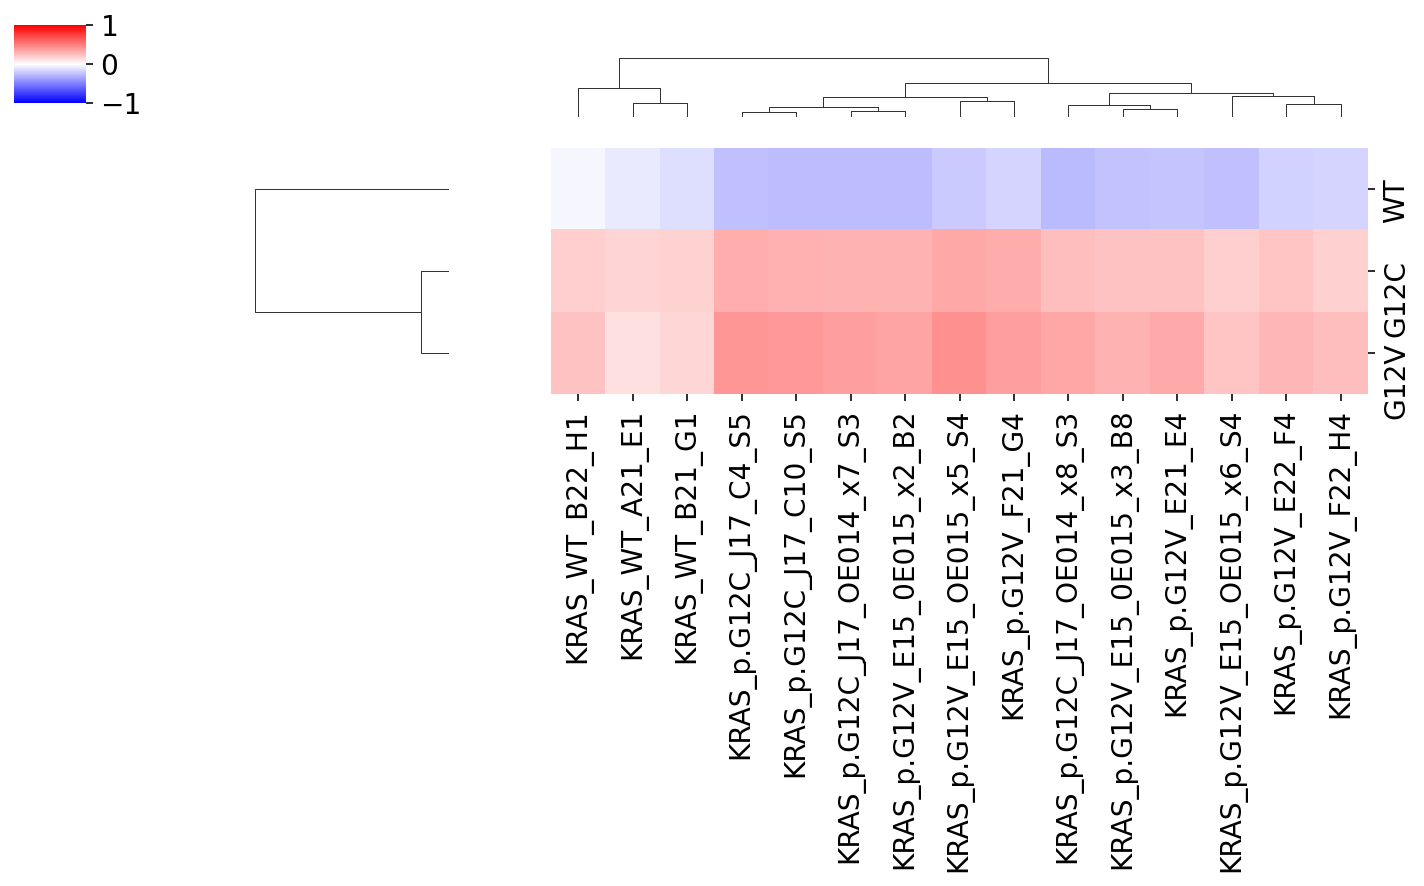

In [59]:
x=1
sns.clustermap(rep_df,#rep_df.loc[['KRAS' in x for x in list(rep_df.index)],:],#annot=True,
               cmap='bwr',vmin=-x,vmax=x,
               yticklabels=True,
               #metric='correlation',
               figsize=(10,3),
               #z_score=1,
               #figsize=(10,2),
              )

In [64]:
vs=['WT','G12C','G12V']
d1=evip_var
d2=rnadata_var

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]
cols1=list(evip_var.obs['variant'])
#cols2=rnadata_var.obs['variant']
##cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in ['WT','G12C','G12V','P278H','P278H','P278T']]

all_cols=list(set(cols1).union(cols2))
all_cols=list(set(all_cols).difference(['multiple','unassigned']))
rep_df=pd.DataFrame(0,index=all_cols,columns=all_cols)
print(cols1)
print(cols2)

for r1 in all_cols:
    for r2 in all_cols:
        #print(r1,r2)
        if r1 in cols1:
            a=d1[r1,].X.flatten()
        if r1 in cols2:
            a=d2[r1,].X.flatten()
        if r2 in cols1:
            b=d1[r2,].X.flatten()
        if r2 in cols2:
            b=d2[r2,].X.flatten()
        
        sp,p,d=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        #if r1=='WT':
        #    print(r2,sp)
        #    if r2=='WT':
        #        print(a[:5],b[:5])
        import copy
        rep_df.loc[r1,r2]=copy.deepcopy(sp)

['Q61A', 'G60S', 'G12Y', 'G12A', 'T50P', 'K169K', 'G60D', 'Q22K', 'V112I', 'K117N', 'T20R', 'K179R', 'M170L', 'G75A', 'G12R', 'A146P', 'S136N', 'I36M', 'Q61H', 'T74A', 'Q25H', 'K117R', 'V8V', 'A130V', 'A146T', 'R41K', 'K88K', 'L19F', 'G13V', 'Y166H', 'T127T', 'T158T', 'D30D', 'T50I', 'S17S', 'T20T', 'P34L', 'G13C', 'I163S', 'N26Y', 'T20M', 'Q22H', 'A59E', 'G12C', 'G12D', 'R149K', 'T50T', 'L52F', 'P34R', 'Q61L', 'unassigned', 'D57N', 'F141L', 'L79I', 'G13E', 'G12F', 'R164Q', 'T144T', 'K147T', 'WT', 'C185Y', 'D173D', 'P110S', 'E31K', 'G12I', 'K176Q', 'G77A', 'T58I', 'L159S', 'E63K', 'multiple', 'Q99E', 'V14I', 'T144P', 'Q61R', 'R135T', 'Q61K', 'A155G', 'G12V', 'A59T', 'D119G', 'T74T', 'Q61P', 'A59G', 'D33E', 'K5E', 'T158A', 'R68S', 'C118S', 'AG59GV', 'G60V', 'AG11TD', 'G13R', 'M111L', 'G12S', 'A146V', 'K178K', 'K147N', 'A66A', 'V14L']
['KRAS_p.G12C_J17_C4_S5', 'KRAS_p.G12C_J17_C10_S5', 'KRAS_p.G12V_E15_OE015_x5_S4', 'KRAS_p.G12V_E15_OE015_x6_S4', 'KRAS_p.G12C_J17_OE014_x7_S3', 'KRAS_p.G1

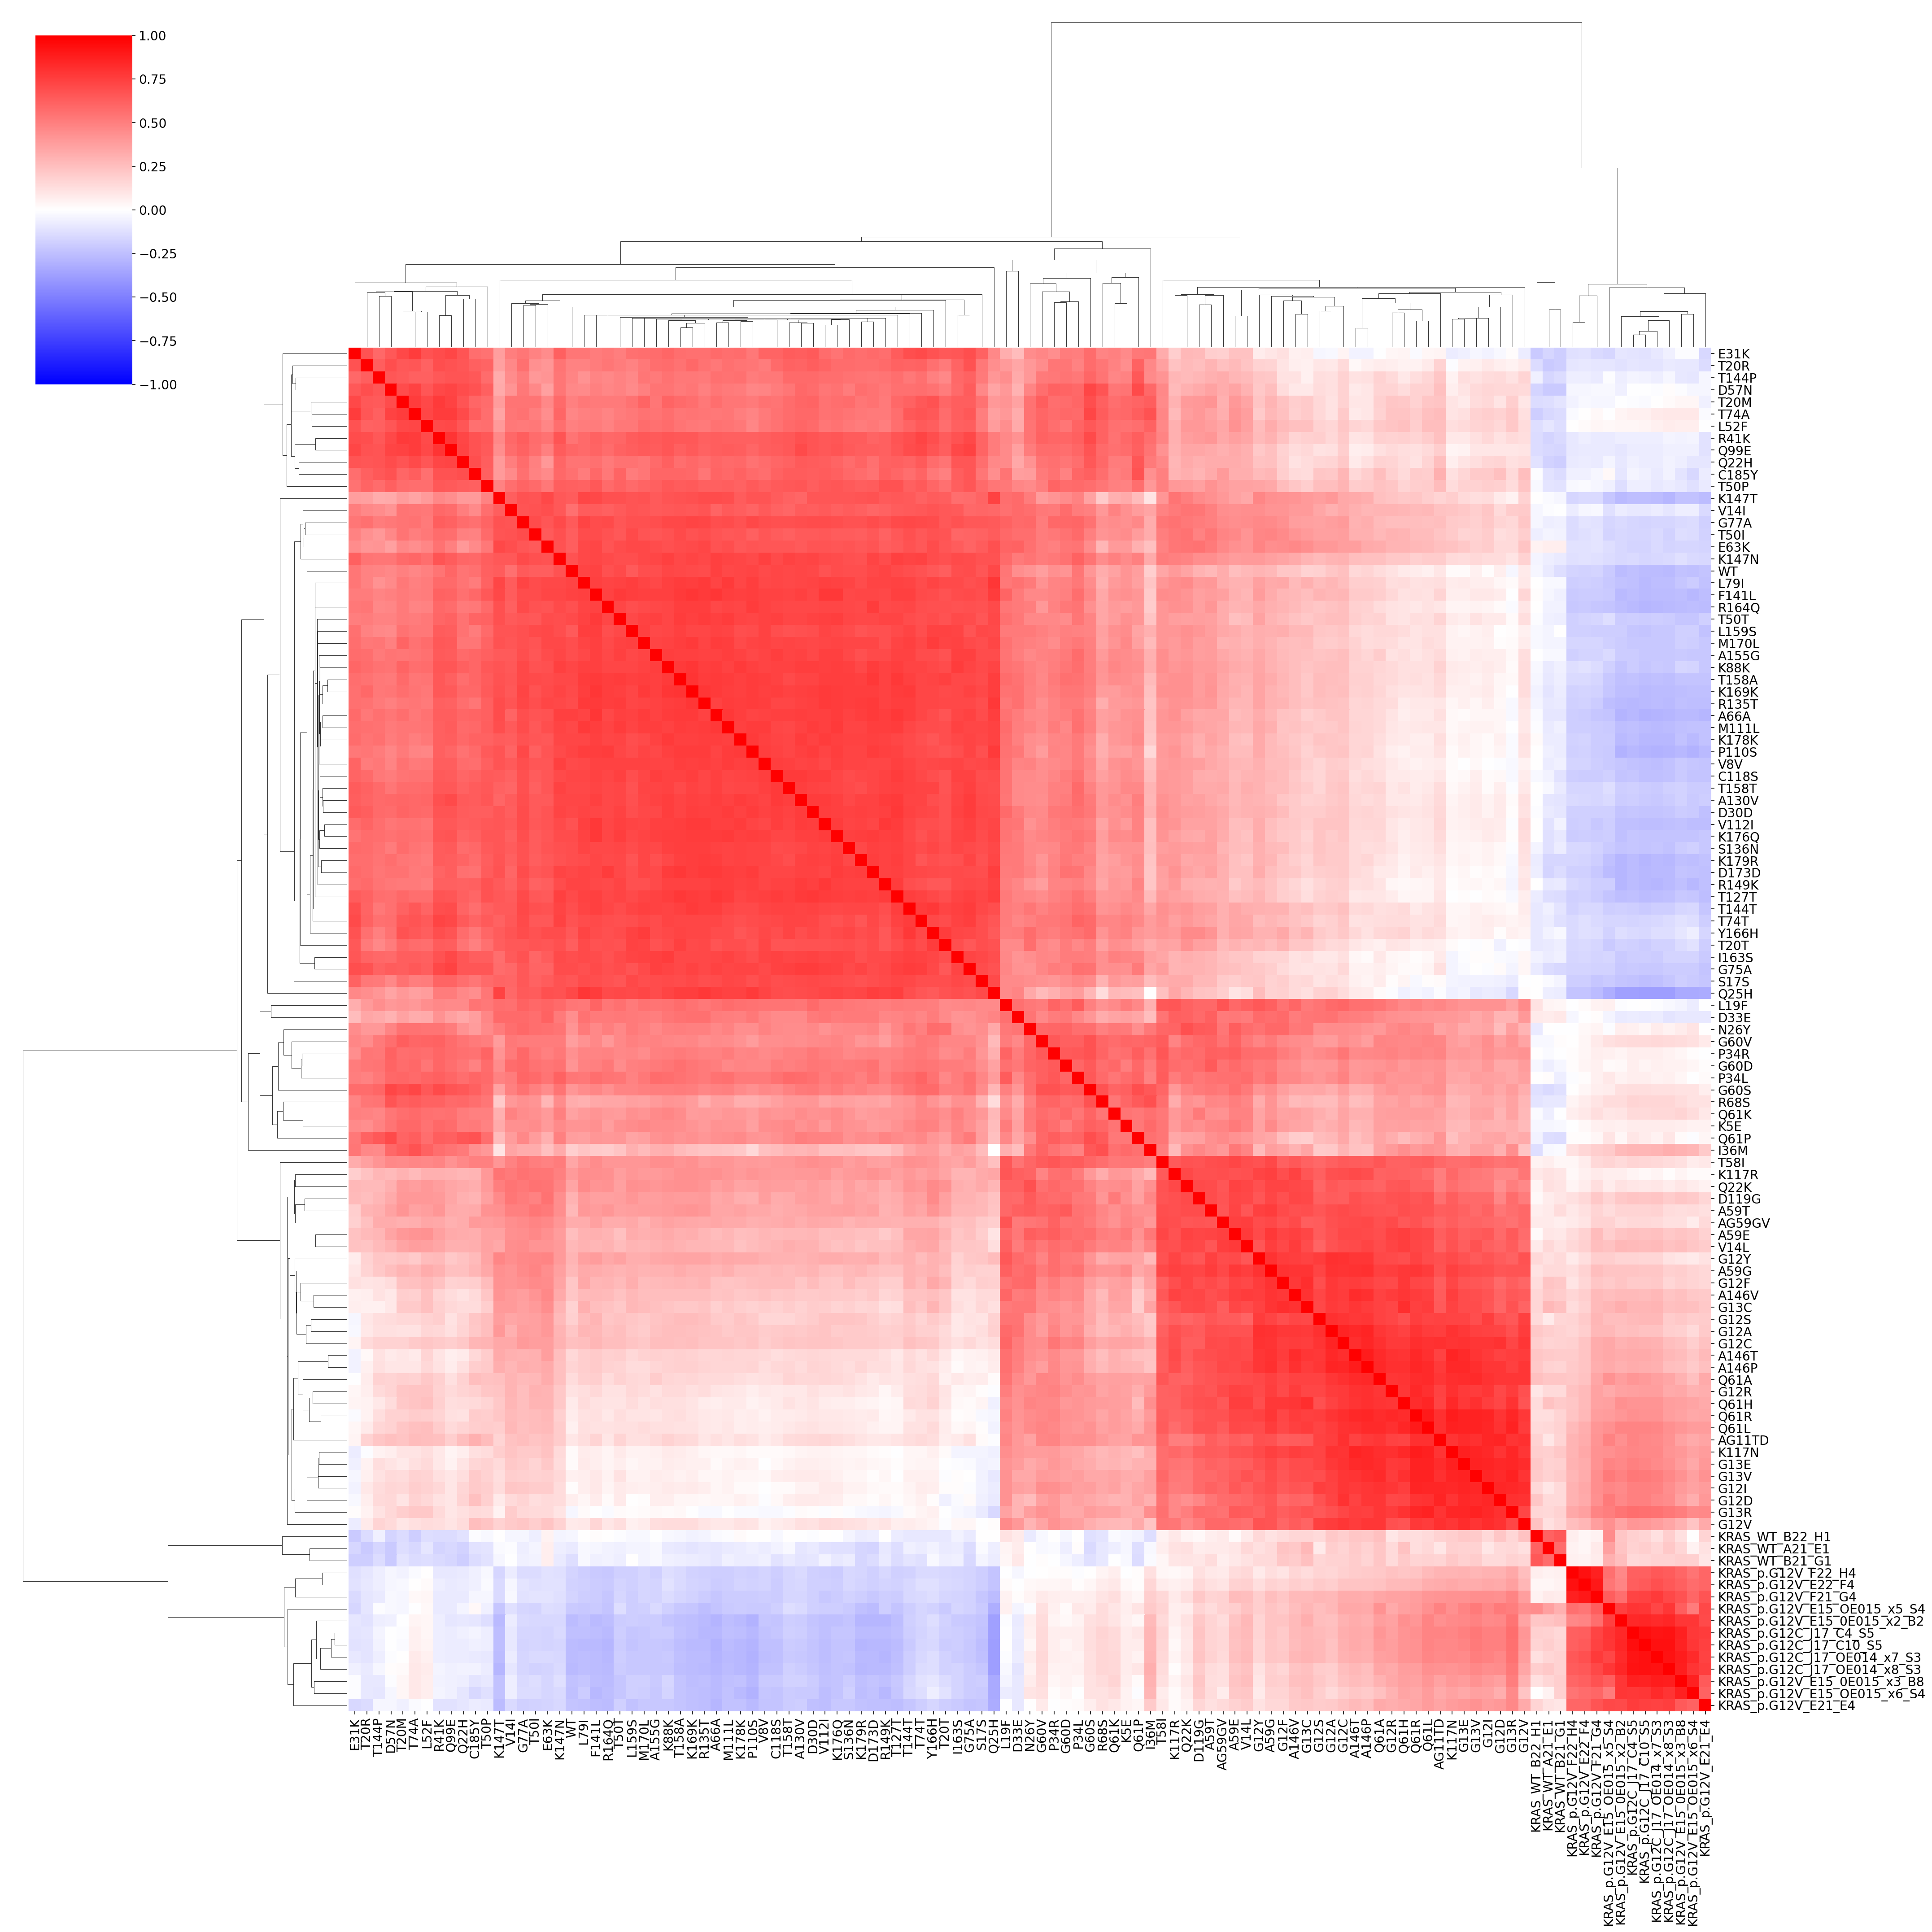

In [65]:
from scipy.cluster import hierarchy
import seaborn as sns

vmin=-1
vmax=1
cmap='bwr'
metric='cityblock'
figwidth=30
figheight=30
row_Z = hierarchy.linkage(rep_df, metric=metric,optimal_ordering=True)
sns.mpl.pyplot.close()
row_dn = hierarchy.dendrogram(row_Z, labels=rep_df.columns,
                          orientation='right')
sns.mpl.pyplot.close()

col_Z = hierarchy.linkage(rep_df.T, metric=metric,optimal_ordering=True)
sns.mpl.pyplot.close()
col_dn = hierarchy.dendrogram(col_Z, labels=rep_df.index,
                          orientation='right')
sns.mpl.pyplot.close()

g=sns.clustermap(rep_df,#rep_df.iloc[row_dn['leaves'],col_dn['leaves']],
                 cmap=cmap,vmin=vmin,vmax=vmax,
             #row_cluster=False,
                 #col_cluster=False,
                 figsize=(figwidth,figheight),row_linkage=row_Z,col_linkage=col_Z,
                xticklabels=True,yticklabels=True)

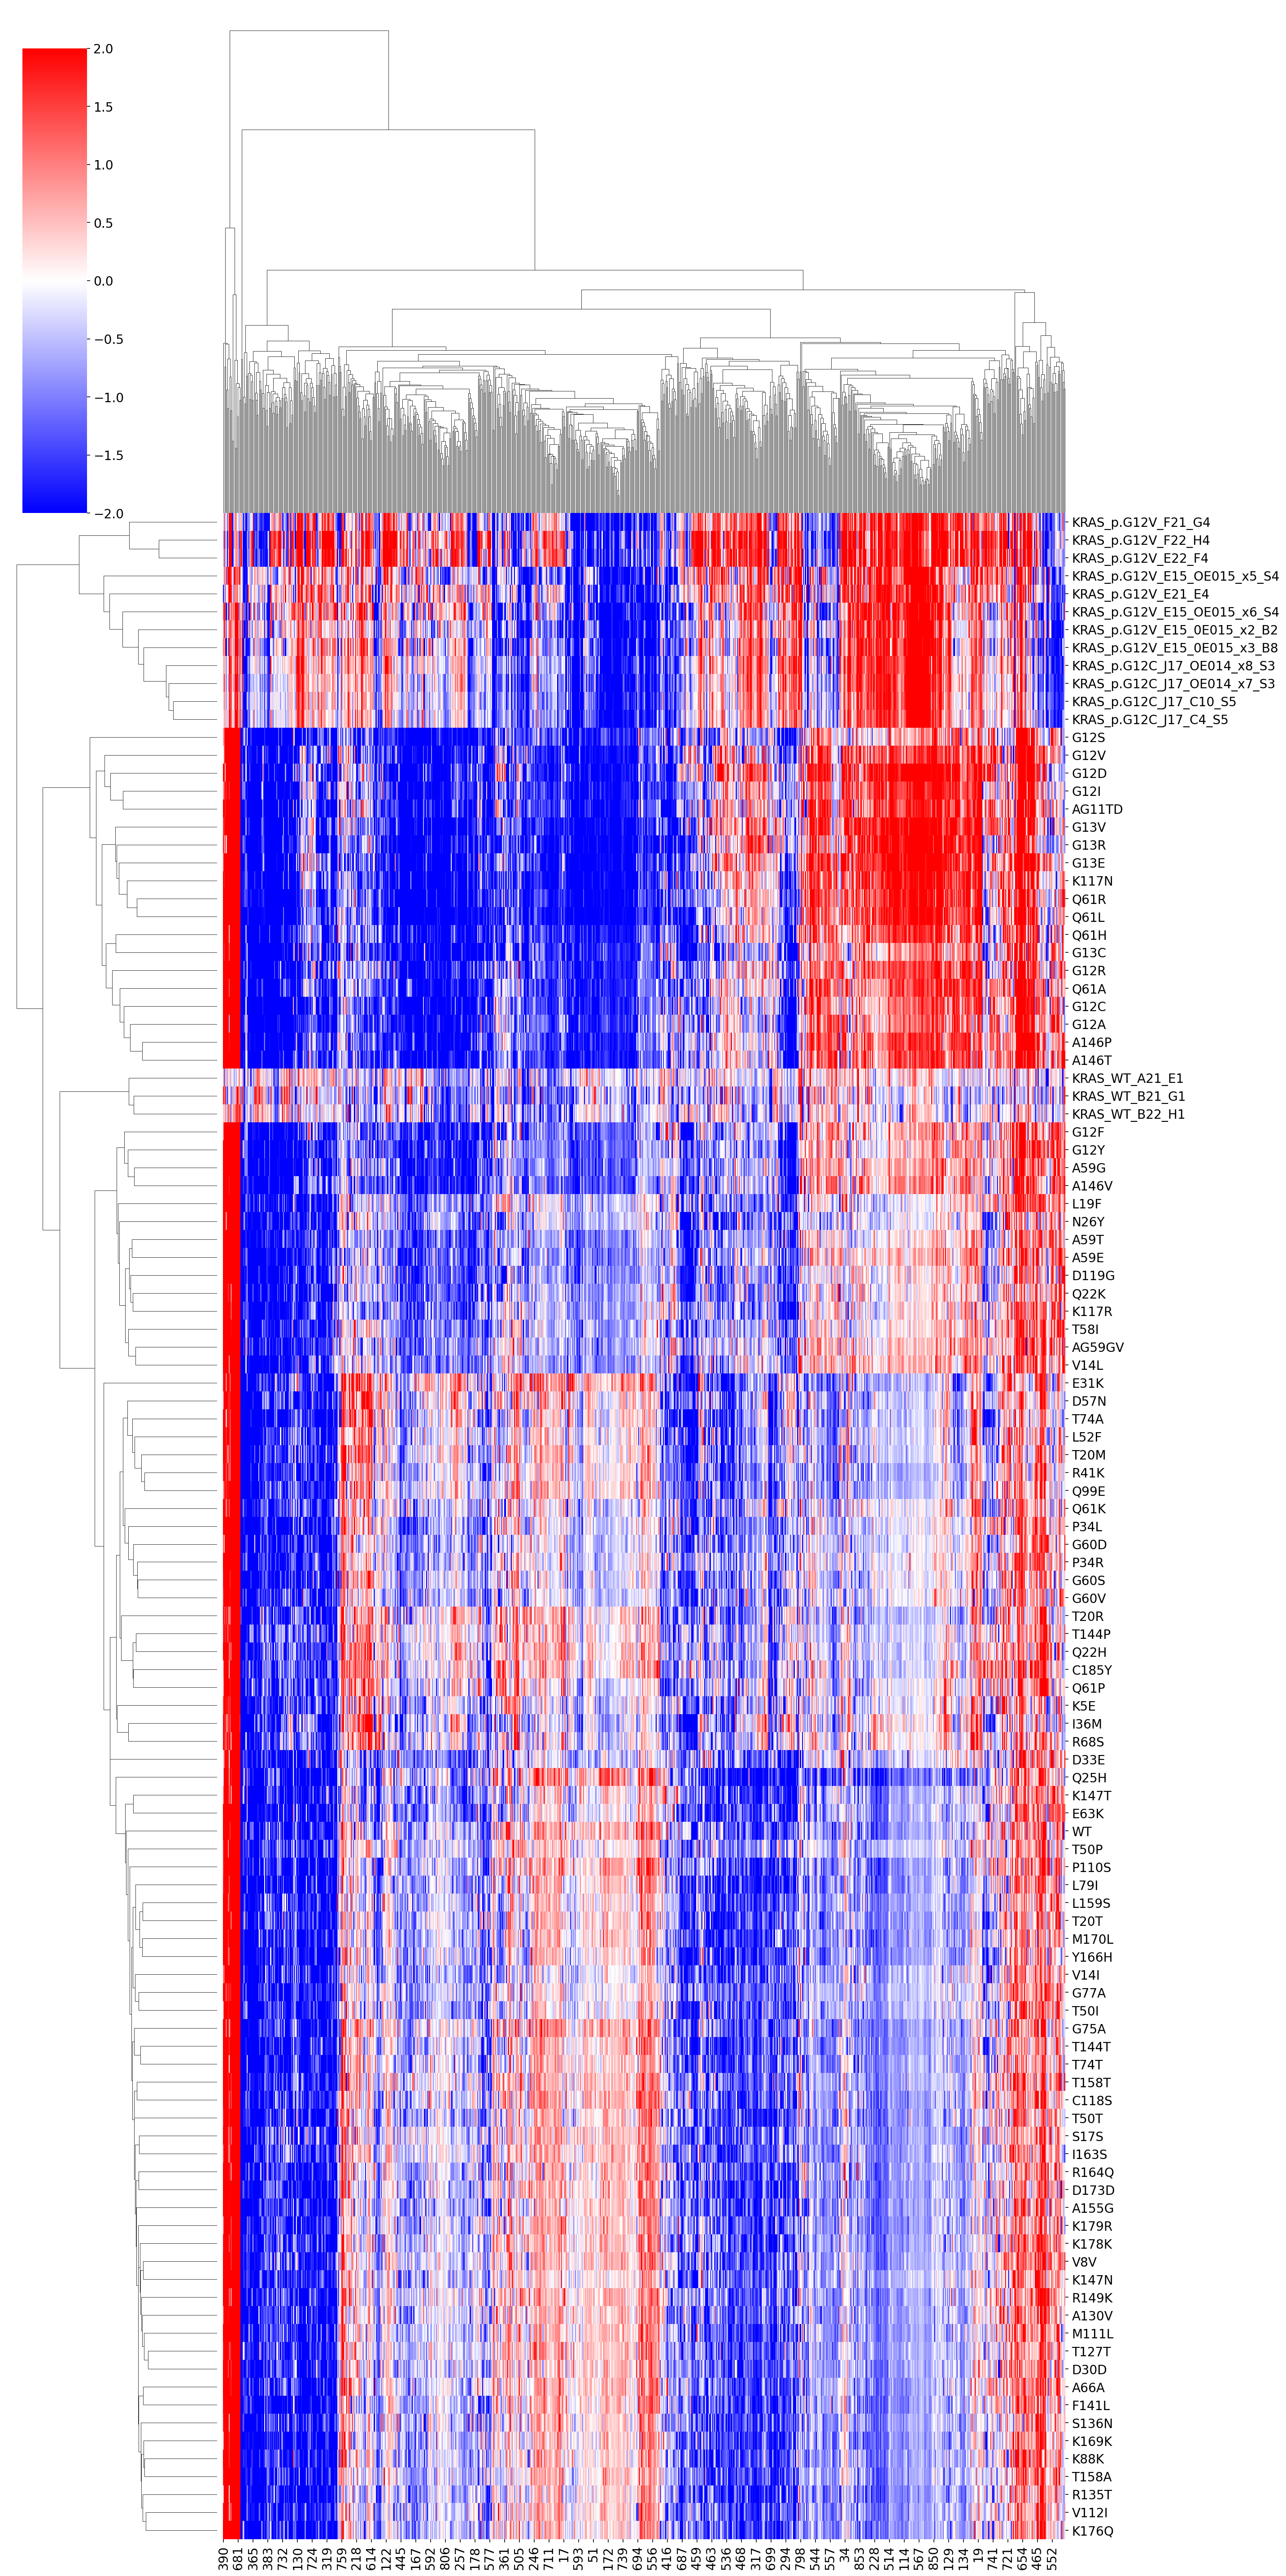

In [67]:
comb=pd.concat([pd.DataFrame(rnadata_var.X,index=rnadata_var.obs_names),
                pd.DataFrame(evip_var.X,#[['KRAS_WT','KRAS_G12C','KRAS_G12V'],:].X,
                             index=evip_var.obs_names)])#[['KRAS_WT','KRAS_G12C','KRAS_G12V'],:].obs_names)])


x=2
sns.clustermap(comb.loc[all_cols,:],
              vmin=-x,vmax=x,cmap='bwr',
               yticklabels=True,figsize=(20,40),
               #metric='correlation',
               
              )

In [88]:
sc_genes=set(adata.var_names).union(adata_p53.var_names)
sc_genes2=sc_genes.intersection(adata.raw.var_names).intersection(adata_p53.raw.var_names)
#var_genes=list(set(adata.var_names).intersection(rnadata.var_names).intersection(adata_p53.var_names))
var_genes=list(sc_genes2.intersection(rnadata.var_names))
print(len(var_genes))

1302


In [89]:
perturb.tl.bulk(adata_counts,'variant')
perturb.tl.bulk(adata_counts_p53,'variant')

In [90]:
combined_adatas=pd.concat([adata_counts.uns['bulk.variant'].loc[:,var_genes],
                          adata_counts_p53.uns['bulk.variant'].loc[:,var_genes]])

In [91]:
#evip_var=sc.AnnData(adata_counts.uns['bulk.variant'].loc[:,var_genes])
evip_var=sc.AnnData(combined_adatas)
sc.pp.log1p(evip_var)
variants=[]
for i in range(adata_counts.uns['bulk.variant'].shape[0]):
    variants.append('KRAS_'+list(adata_counts.uns['bulk.variant'].index)[i])
for i in range(adata_counts_p53.uns['bulk.variant'].shape[0]):
    variants.append('TP53_'+list(adata_counts_p53.uns['bulk.variant'].index)[i])
print(variants)
evip_var=sc.AnnData(combined_adatas)
sc.pp.log1p(evip_var)
evip_var.obs['variant']=variants
evip_var.obs_names=variants

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


['KRAS_P110S', 'KRAS_P34L', 'KRAS_C118S', 'KRAS_V112I', 'KRAS_K179R', 'KRAS_K147N', 'KRAS_M170L', 'KRAS_C185Y', 'KRAS_T74A', 'KRAS_L19F', 'KRAS_Q61K', 'KRAS_A59T', 'KRAS_A130V', 'KRAS_WT', 'KRAS_T127T', 'KRAS_R41K', 'KRAS_G13E', 'KRAS_E63K', 'KRAS_V8V', 'KRAS_A59G', 'KRAS_G77A', 'KRAS_A146T', 'KRAS_M111L', 'KRAS_G12F', 'KRAS_F141L', 'KRAS_Q61A', 'KRAS_G12D', 'KRAS_I36M', 'KRAS_G12Y', 'KRAS_K147T', 'KRAS_L52F', 'KRAS_G12C', 'KRAS_S136N', 'KRAS_T158A', 'KRAS_D119G', 'KRAS_unassigned', 'KRAS_A146V', 'KRAS_G12S', 'KRAS_T20M', 'KRAS_Y166H', 'KRAS_N26Y', 'KRAS_V14L', 'KRAS_G12R', 'KRAS_AG11TD', 'KRAS_K169K', 'KRAS_A146P', 'KRAS_G13C', 'KRAS_Q25H', 'KRAS_D57N', 'KRAS_Q61H', 'KRAS_L79I', 'KRAS_T50T', 'KRAS_multiple', 'KRAS_Q22K', 'KRAS_K178K', 'KRAS_T58I', 'KRAS_G60D', 'KRAS_T74T', 'KRAS_D173D', 'KRAS_P34R', 'KRAS_R135T', 'KRAS_AG59GV', 'KRAS_R164Q', 'KRAS_Q61R', 'KRAS_G60V', 'KRAS_T144P', 'KRAS_L159S', 'KRAS_K117N', 'KRAS_T20R', 'KRAS_T20T', 'KRAS_D30D', 'KRAS_G13R', 'KRAS_K5E', 'KRAS_D33E', 

In [92]:
rnadata_var=rnadata[:,var_genes]
sc.pp.log1p(rnadata_var)

In [93]:
sc.pp.scale(evip_var,max_value=10)
sc.pp.scale(rnadata_var,max_value=10)

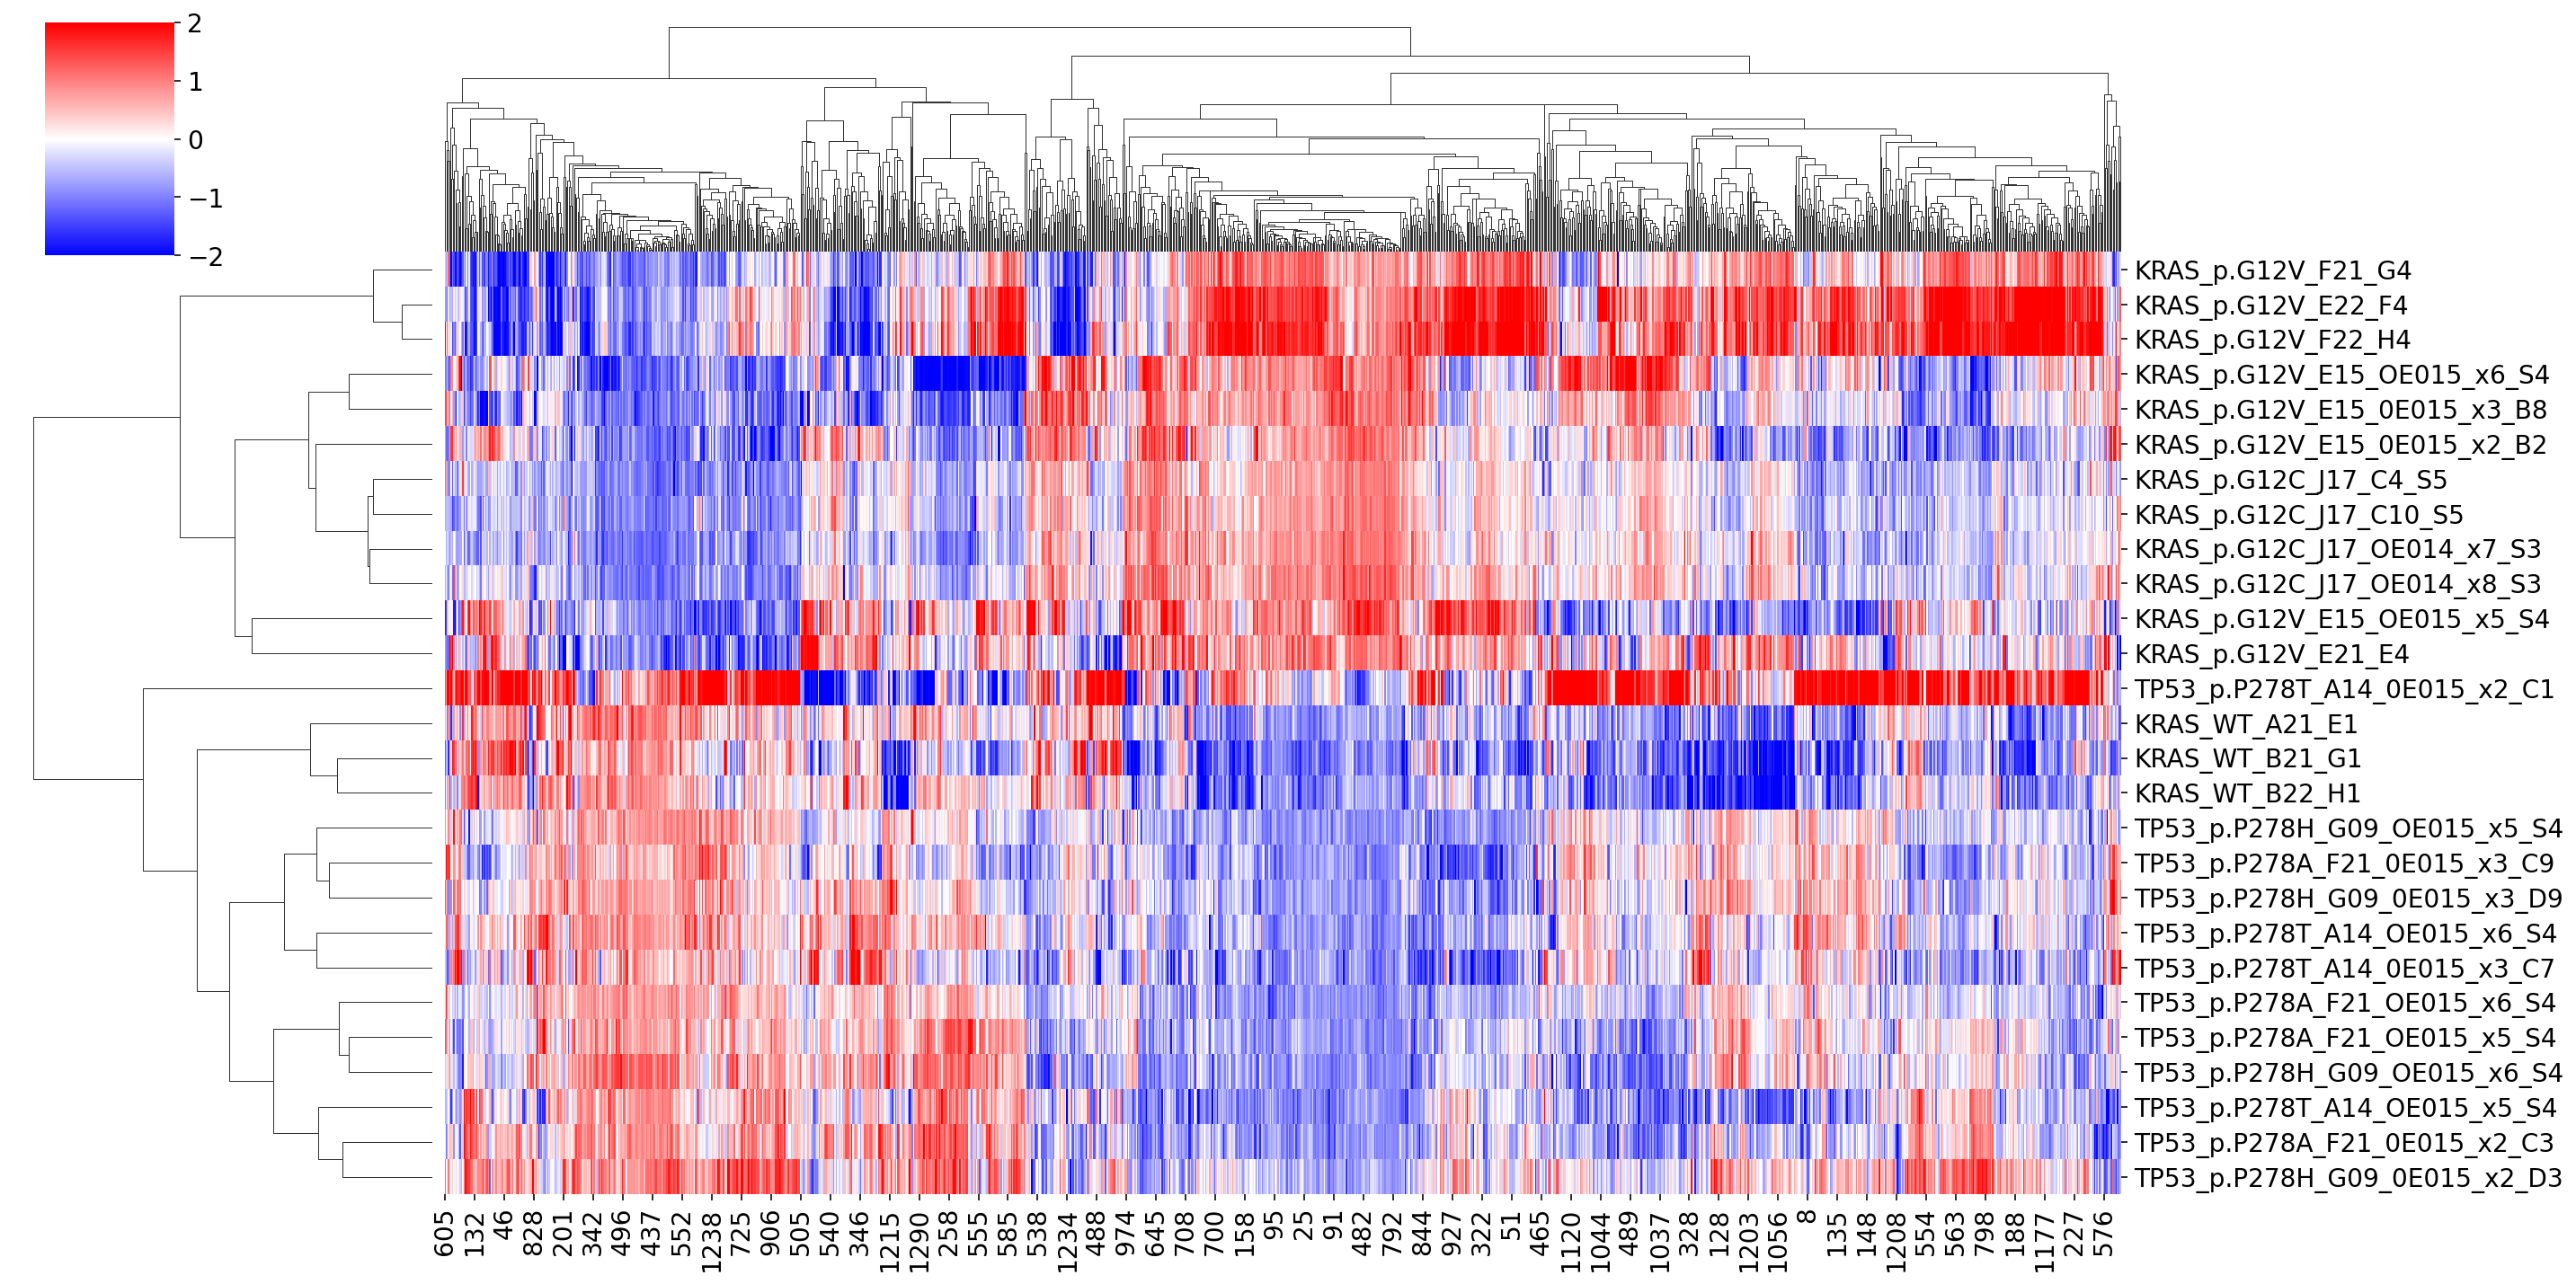

In [94]:
x=2
sns.clustermap(pd.DataFrame(rnadata_var.X,index=rnadata_var.obs_names),
              vmin=-x,vmax=x,cmap='bwr',
               yticklabels=True,figsize=(20,10),
               metric='correlation',
              )

In [97]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

PROTEIN='KRAS'
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)

sorted_variants_df=pd.read_csv(DATA+'/'+PROTEIN+'/clustering/'+PROTEIN+'.corrL1.sorted_variants_2021-03-23.csv',header=None)
sorted_variants_df.index=sorted_variants_df[0]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/
['M111L', 'T127T', 'V112I', 'R149K', 'S17S', 'T74T', 'I163S', 'G75A', 'S136N', 'K179R', 'T158A', 'T20T', 'V8V', 'A66A', 'M170L', 'D173D', 'T158T', 'A130V', 'D30D', 'K176Q', 'T144T', 'C118S', 'Y166H', 'WT', 'K88K', 'A155G', 'T50T', 'K169K', 'F141L', 'R135T', 'R164Q', 'P110S', 'K178K', 'L159S', 'L79I', 'Q25H', 'K147N', 'G77A', 'K147T', 'E63K', 'V14I', 'T50I', 'E31K', 'Q99E', 'R41K', 'T50P', 'T20R', 'Q22H', 'C185Y', 'T20M', 'T144P', 'L52F', 'T74A', 'D57N', 'unassigned', 'N26Y', 'D33E', 'L19F', 'Q61K', 'P34L', 'K5E', 'P34R', 'G60D', 'Q61P', 'G60S', 'G60V', 'R68S', 'I36M', 'T58I', 'Q22K', 'K117R', 'A59T', 'AG59GV', 'D119G', 'G12Y', 'G12F', 'V14L', 'A59E', 'G12S', 'G12A', 'A59G', 'A146V', 'G13C', 'G12C', 'A146P', 'A146T', 'G12V', 'AG11TD', 'G12D', 'G12I', 'G12R', 'Q61A', 'Q61H', 'Q61R', 'Q61L', 'G13E', 'K117N', 'G13V', 'G13R']


['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'black', 'gold', 'black', 'black', 'black', 'black', 'black', '#138D75', '#138D75', '#BB8FCE', 'gold', 'red', 'black', 'black', 'black', '#138D75', 'red', 'black', 'black', 'red', 'black', 'red', 'black', 'red', 'black', 'red', 'red', 'gold', 'red', 'black', '#138D75', 'red', 'black', 'black', 'red', '#BB8FCE', 'red', 'red', '#138D75', 'black', '#BB8FCE', 'red', 'red', 'red', 'black', 'red', 'red', 'black', '#138D75', 'red', 'black', 'black', 'white', 'red', 'black', 'red', 'gold', 'black', 'black', 'gold', 'black', 'red', 'black', 'red', 'gold', '#138D75', 'black', 'red', '#138D75', 'black', 'black', 'red', 'gold', '#BB8FCE', 'black', 'red', 'red', 'black', 'red', 'black', 'red', 'black', 'black', 'red', 'gold', '#138D75', '#138D75', '#138D75', 

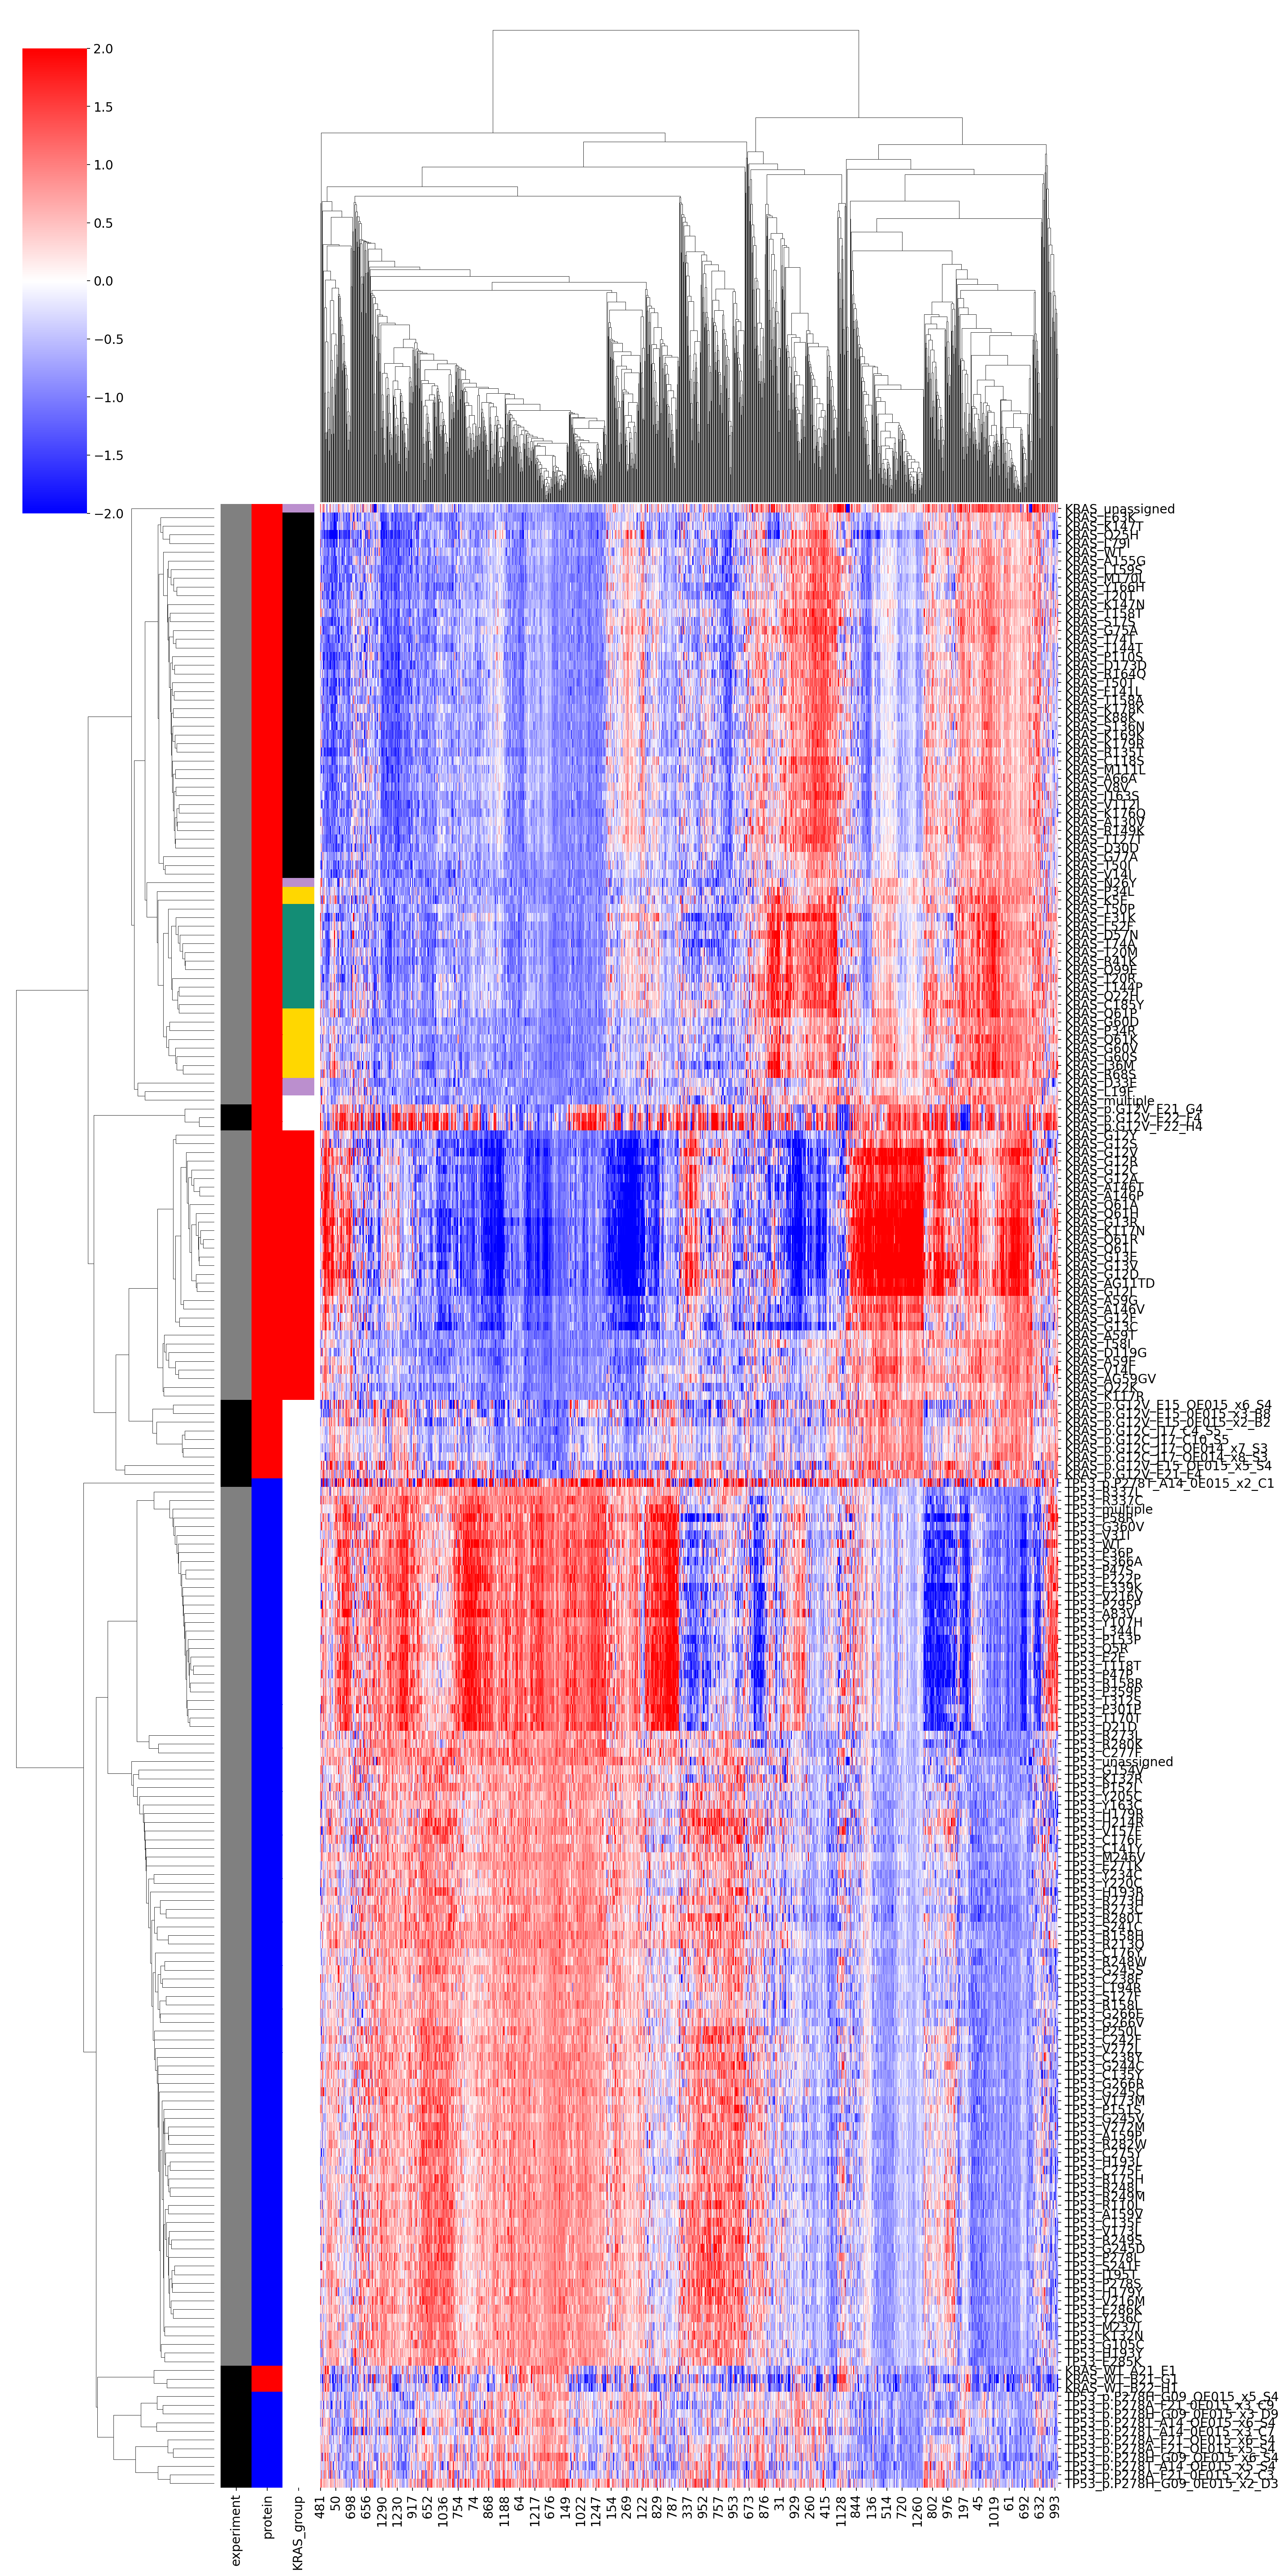

In [107]:
comb=pd.concat([pd.DataFrame(rnadata_var.X,index=rnadata_var.obs_names),
                pd.DataFrame(evip_var.X,#[['KRAS_WT','KRAS_G12C','KRAS_G12V'],:].X,
                             index=evip_var.obs_names)])#[['KRAS_WT','KRAS_G12C','KRAS_G12V'],:].obs_names)])
color_df=pd.DataFrame({'variant':comb.index,
                      'experiment':'gray',
                      'protein':'blue'},index=comb.index)
color_df.loc[color_df['variant'].isin(rnadata_var.obs_names),'experiment']='black'
color_df.loc[['KRAS' in x for x in comb.index],'protein']='red'
group=[]
for i in range(color_df.shape[0]):
    v=color_df.index[i]
    
    if 'KRAS_WT_' in v or 'TP53' in v:
        group.append('white')
    else:
        v=v.split('_')[1]
        if v not in list(anno.index) or 'TP53' in v:
            group.append('white')
        else:
            group.append(anno.loc[v,'cluster_color2'])
print(group)
color_df['KRAS_group']=group


x=2
sns.clustermap(comb,
              vmin=-x,vmax=x,cmap='bwr',
               yticklabels=True,figsize=(20,40),
               metric='correlation',
               row_colors=color_df.loc[:,['experiment','protein','KRAS_group']],
              )

In [108]:
#compare all evip pairs

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals)
    p,pp=pearsonr(xvals,yvals)
    d=distance.cityblock(xvals,yvals)
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,d)

vs=['WT','G12C','G12V']
d1=evip_var
d2=rnadata_var

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]
cols1=evip_var.obs['variant']
#cols2=rnadata_var.obs['variant']
##cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in ['WT','G12C','G12V','P278H','P278H','P278T']]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

rep_sp=[]
rep_p=[]
between_sp=[]
between_p=[]
rep_d=[]
between_d=[]
for r1 in cols1:
    for r2 in cols2:
        print(r1,r2)
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,d=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        if d1.obs['variant'].loc[r1]==d2.obs['variant'].loc[r2]:
            rep_sp.append(sp)
            rep_p.append(p)
            rep_d.append(d)
        else:
            between_sp.append(sp)
            between_p.append(p)
            between_d.append(d)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

KRAS_P110S KRAS_p.G12C_J17_C4_S5
KRAS_P110S KRAS_p.G12C_J17_C10_S5
KRAS_P110S KRAS_p.G12V_E15_OE015_x5_S4
KRAS_P110S KRAS_p.G12V_E15_OE015_x6_S4
KRAS_P110S KRAS_p.G12C_J17_OE014_x7_S3
KRAS_P110S KRAS_p.G12C_J17_OE014_x8_S3
KRAS_P110S KRAS_p.G12V_E15_0E015_x2_B2
KRAS_P110S KRAS_p.G12V_E15_0E015_x3_B8
KRAS_P110S KRAS_WT_A21_E1
KRAS_P110S KRAS_WT_B21_G1
KRAS_P110S KRAS_WT_B22_H1
KRAS_P110S KRAS_p.G12V_E21_E4
KRAS_P110S KRAS_p.G12V_E22_F4
KRAS_P110S KRAS_p.G12V_F21_G4
KRAS_P110S KRAS_p.G12V_F22_H4
KRAS_P34L KRAS_p.G12C_J17_C4_S5
KRAS_P34L KRAS_p.G12C_J17_C10_S5
KRAS_P34L KRAS_p.G12V_E15_OE015_x5_S4
KRAS_P34L KRAS_p.G12V_E15_OE015_x6_S4
KRAS_P34L KRAS_p.G12C_J17_OE014_x7_S3
KRAS_P34L KRAS_p.G12C_J17_OE014_x8_S3
KRAS_P34L KRAS_p.G12V_E15_0E015_x2_B2
KRAS_P34L KRAS_p.G12V_E15_0E015_x3_B8
KRAS_P34L KRAS_WT_A21_E1
KRAS_P34L KRAS_WT_B21_G1
KRAS_P34L KRAS_WT_B22_H1
KRAS_P34L KRAS_p.G12V_E21_E4
KRAS_P34L KRAS_p.G12V_E22_F4
KRAS_P34L KRAS_p.G12V_F21_G4
KRAS_P34L KRAS_p.G12V_F22_H4
KRAS_C118S KRAS_p

KRAS_V8V KRAS_p.G12V_E22_F4
KRAS_V8V KRAS_p.G12V_F21_G4
KRAS_V8V KRAS_p.G12V_F22_H4
KRAS_A59G KRAS_p.G12C_J17_C4_S5
KRAS_A59G KRAS_p.G12C_J17_C10_S5
KRAS_A59G KRAS_p.G12V_E15_OE015_x5_S4
KRAS_A59G KRAS_p.G12V_E15_OE015_x6_S4
KRAS_A59G KRAS_p.G12C_J17_OE014_x7_S3
KRAS_A59G KRAS_p.G12C_J17_OE014_x8_S3
KRAS_A59G KRAS_p.G12V_E15_0E015_x2_B2
KRAS_A59G KRAS_p.G12V_E15_0E015_x3_B8
KRAS_A59G KRAS_WT_A21_E1
KRAS_A59G KRAS_WT_B21_G1
KRAS_A59G KRAS_WT_B22_H1
KRAS_A59G KRAS_p.G12V_E21_E4
KRAS_A59G KRAS_p.G12V_E22_F4
KRAS_A59G KRAS_p.G12V_F21_G4
KRAS_A59G KRAS_p.G12V_F22_H4
KRAS_G77A KRAS_p.G12C_J17_C4_S5
KRAS_G77A KRAS_p.G12C_J17_C10_S5
KRAS_G77A KRAS_p.G12V_E15_OE015_x5_S4
KRAS_G77A KRAS_p.G12V_E15_OE015_x6_S4
KRAS_G77A KRAS_p.G12C_J17_OE014_x7_S3
KRAS_G77A KRAS_p.G12C_J17_OE014_x8_S3
KRAS_G77A KRAS_p.G12V_E15_0E015_x2_B2
KRAS_G77A KRAS_p.G12V_E15_0E015_x3_B8
KRAS_G77A KRAS_WT_A21_E1
KRAS_G77A KRAS_WT_B21_G1
KRAS_G77A KRAS_WT_B22_H1
KRAS_G77A KRAS_p.G12V_E21_E4
KRAS_G77A KRAS_p.G12V_E22_F4
KRAS_G

KRAS_G12R KRAS_p.G12V_E22_F4
KRAS_G12R KRAS_p.G12V_F21_G4
KRAS_G12R KRAS_p.G12V_F22_H4
KRAS_AG11TD KRAS_p.G12C_J17_C4_S5
KRAS_AG11TD KRAS_p.G12C_J17_C10_S5
KRAS_AG11TD KRAS_p.G12V_E15_OE015_x5_S4
KRAS_AG11TD KRAS_p.G12V_E15_OE015_x6_S4
KRAS_AG11TD KRAS_p.G12C_J17_OE014_x7_S3
KRAS_AG11TD KRAS_p.G12C_J17_OE014_x8_S3
KRAS_AG11TD KRAS_p.G12V_E15_0E015_x2_B2
KRAS_AG11TD KRAS_p.G12V_E15_0E015_x3_B8
KRAS_AG11TD KRAS_WT_A21_E1
KRAS_AG11TD KRAS_WT_B21_G1
KRAS_AG11TD KRAS_WT_B22_H1
KRAS_AG11TD KRAS_p.G12V_E21_E4
KRAS_AG11TD KRAS_p.G12V_E22_F4
KRAS_AG11TD KRAS_p.G12V_F21_G4
KRAS_AG11TD KRAS_p.G12V_F22_H4
KRAS_K169K KRAS_p.G12C_J17_C4_S5
KRAS_K169K KRAS_p.G12C_J17_C10_S5
KRAS_K169K KRAS_p.G12V_E15_OE015_x5_S4
KRAS_K169K KRAS_p.G12V_E15_OE015_x6_S4
KRAS_K169K KRAS_p.G12C_J17_OE014_x7_S3
KRAS_K169K KRAS_p.G12C_J17_OE014_x8_S3
KRAS_K169K KRAS_p.G12V_E15_0E015_x2_B2
KRAS_K169K KRAS_p.G12V_E15_0E015_x3_B8
KRAS_K169K KRAS_WT_A21_E1
KRAS_K169K KRAS_WT_B21_G1
KRAS_K169K KRAS_WT_B22_H1
KRAS_K169K KRAS_p.G1

KRAS_T144P KRAS_p.G12V_E15_OE015_x6_S4
KRAS_T144P KRAS_p.G12C_J17_OE014_x7_S3
KRAS_T144P KRAS_p.G12C_J17_OE014_x8_S3
KRAS_T144P KRAS_p.G12V_E15_0E015_x2_B2
KRAS_T144P KRAS_p.G12V_E15_0E015_x3_B8
KRAS_T144P KRAS_WT_A21_E1
KRAS_T144P KRAS_WT_B21_G1
KRAS_T144P KRAS_WT_B22_H1
KRAS_T144P KRAS_p.G12V_E21_E4
KRAS_T144P KRAS_p.G12V_E22_F4
KRAS_T144P KRAS_p.G12V_F21_G4
KRAS_T144P KRAS_p.G12V_F22_H4
KRAS_L159S KRAS_p.G12C_J17_C4_S5
KRAS_L159S KRAS_p.G12C_J17_C10_S5
KRAS_L159S KRAS_p.G12V_E15_OE015_x5_S4
KRAS_L159S KRAS_p.G12V_E15_OE015_x6_S4
KRAS_L159S KRAS_p.G12C_J17_OE014_x7_S3
KRAS_L159S KRAS_p.G12C_J17_OE014_x8_S3
KRAS_L159S KRAS_p.G12V_E15_0E015_x2_B2
KRAS_L159S KRAS_p.G12V_E15_0E015_x3_B8
KRAS_L159S KRAS_WT_A21_E1
KRAS_L159S KRAS_WT_B21_G1
KRAS_L159S KRAS_WT_B22_H1
KRAS_L159S KRAS_p.G12V_E21_E4
KRAS_L159S KRAS_p.G12V_E22_F4
KRAS_L159S KRAS_p.G12V_F21_G4
KRAS_L159S KRAS_p.G12V_F22_H4
KRAS_K117N KRAS_p.G12C_J17_C4_S5
KRAS_K117N KRAS_p.G12C_J17_C10_S5
KRAS_K117N KRAS_p.G12V_E15_OE015_x5_S4
KR

KRAS_G60S KRAS_p.G12V_E15_0E015_x2_B2
KRAS_G60S KRAS_p.G12V_E15_0E015_x3_B8
KRAS_G60S KRAS_WT_A21_E1
KRAS_G60S KRAS_WT_B21_G1
KRAS_G60S KRAS_WT_B22_H1
KRAS_G60S KRAS_p.G12V_E21_E4
KRAS_G60S KRAS_p.G12V_E22_F4
KRAS_G60S KRAS_p.G12V_F21_G4
KRAS_G60S KRAS_p.G12V_F22_H4
KRAS_T144T KRAS_p.G12C_J17_C4_S5
KRAS_T144T KRAS_p.G12C_J17_C10_S5
KRAS_T144T KRAS_p.G12V_E15_OE015_x5_S4
KRAS_T144T KRAS_p.G12V_E15_OE015_x6_S4
KRAS_T144T KRAS_p.G12C_J17_OE014_x7_S3
KRAS_T144T KRAS_p.G12C_J17_OE014_x8_S3
KRAS_T144T KRAS_p.G12V_E15_0E015_x2_B2
KRAS_T144T KRAS_p.G12V_E15_0E015_x3_B8
KRAS_T144T KRAS_WT_A21_E1
KRAS_T144T KRAS_WT_B21_G1
KRAS_T144T KRAS_WT_B22_H1
KRAS_T144T KRAS_p.G12V_E21_E4
KRAS_T144T KRAS_p.G12V_E22_F4
KRAS_T144T KRAS_p.G12V_F21_G4
KRAS_T144T KRAS_p.G12V_F22_H4
KRAS_A155G KRAS_p.G12C_J17_C4_S5
KRAS_A155G KRAS_p.G12C_J17_C10_S5
KRAS_A155G KRAS_p.G12V_E15_OE015_x5_S4
KRAS_A155G KRAS_p.G12V_E15_OE015_x6_S4
KRAS_A155G KRAS_p.G12C_J17_OE014_x7_S3
KRAS_A155G KRAS_p.G12C_J17_OE014_x8_S3
KRAS_A155G 

TP53_R158R KRAS_p.G12C_J17_C4_S5
TP53_R158R KRAS_p.G12C_J17_C10_S5
TP53_R158R KRAS_p.G12V_E15_OE015_x5_S4
TP53_R158R KRAS_p.G12V_E15_OE015_x6_S4
TP53_R158R KRAS_p.G12C_J17_OE014_x7_S3
TP53_R158R KRAS_p.G12C_J17_OE014_x8_S3
TP53_R158R KRAS_p.G12V_E15_0E015_x2_B2
TP53_R158R KRAS_p.G12V_E15_0E015_x3_B8
TP53_R158R KRAS_WT_A21_E1
TP53_R158R KRAS_WT_B21_G1
TP53_R158R KRAS_WT_B22_H1
TP53_R158R KRAS_p.G12V_E21_E4
TP53_R158R KRAS_p.G12V_E22_F4
TP53_R158R KRAS_p.G12V_F21_G4
TP53_R158R KRAS_p.G12V_F22_H4
TP53_R273H KRAS_p.G12C_J17_C4_S5
TP53_R273H KRAS_p.G12C_J17_C10_S5
TP53_R273H KRAS_p.G12V_E15_OE015_x5_S4
TP53_R273H KRAS_p.G12V_E15_OE015_x6_S4
TP53_R273H KRAS_p.G12C_J17_OE014_x7_S3
TP53_R273H KRAS_p.G12C_J17_OE014_x8_S3
TP53_R273H KRAS_p.G12V_E15_0E015_x2_B2
TP53_R273H KRAS_p.G12V_E15_0E015_x3_B8
TP53_R273H KRAS_WT_A21_E1
TP53_R273H KRAS_WT_B21_G1
TP53_R273H KRAS_WT_B22_H1
TP53_R273H KRAS_p.G12V_E21_E4
TP53_R273H KRAS_p.G12V_E22_F4
TP53_R273H KRAS_p.G12V_F21_G4
TP53_R273H KRAS_p.G12V_F22_H4
TP

TP53_H193R KRAS_p.G12V_F21_G4
TP53_H193R KRAS_p.G12V_F22_H4
TP53_A159P KRAS_p.G12C_J17_C4_S5
TP53_A159P KRAS_p.G12C_J17_C10_S5
TP53_A159P KRAS_p.G12V_E15_OE015_x5_S4
TP53_A159P KRAS_p.G12V_E15_OE015_x6_S4
TP53_A159P KRAS_p.G12C_J17_OE014_x7_S3
TP53_A159P KRAS_p.G12C_J17_OE014_x8_S3
TP53_A159P KRAS_p.G12V_E15_0E015_x2_B2
TP53_A159P KRAS_p.G12V_E15_0E015_x3_B8
TP53_A159P KRAS_WT_A21_E1
TP53_A159P KRAS_WT_B21_G1
TP53_A159P KRAS_WT_B22_H1
TP53_A159P KRAS_p.G12V_E21_E4
TP53_A159P KRAS_p.G12V_E22_F4
TP53_A159P KRAS_p.G12V_F21_G4
TP53_A159P KRAS_p.G12V_F22_H4
TP53_G244C KRAS_p.G12C_J17_C4_S5
TP53_G244C KRAS_p.G12C_J17_C10_S5
TP53_G244C KRAS_p.G12V_E15_OE015_x5_S4
TP53_G244C KRAS_p.G12V_E15_OE015_x6_S4
TP53_G244C KRAS_p.G12C_J17_OE014_x7_S3
TP53_G244C KRAS_p.G12C_J17_OE014_x8_S3
TP53_G244C KRAS_p.G12V_E15_0E015_x2_B2
TP53_G244C KRAS_p.G12V_E15_0E015_x3_B8
TP53_G244C KRAS_WT_A21_E1
TP53_G244C KRAS_WT_B21_G1
TP53_G244C KRAS_WT_B22_H1
TP53_G244C KRAS_p.G12V_E21_E4
TP53_G244C KRAS_p.G12V_E22_F4
TP

TP53_C238F KRAS_p.G12V_E21_E4
TP53_C238F KRAS_p.G12V_E22_F4
TP53_C238F KRAS_p.G12V_F21_G4
TP53_C238F KRAS_p.G12V_F22_H4
TP53_S127F KRAS_p.G12C_J17_C4_S5
TP53_S127F KRAS_p.G12C_J17_C10_S5
TP53_S127F KRAS_p.G12V_E15_OE015_x5_S4
TP53_S127F KRAS_p.G12V_E15_OE015_x6_S4
TP53_S127F KRAS_p.G12C_J17_OE014_x7_S3
TP53_S127F KRAS_p.G12C_J17_OE014_x8_S3
TP53_S127F KRAS_p.G12V_E15_0E015_x2_B2
TP53_S127F KRAS_p.G12V_E15_0E015_x3_B8
TP53_S127F KRAS_WT_A21_E1
TP53_S127F KRAS_WT_B21_G1
TP53_S127F KRAS_WT_B22_H1
TP53_S127F KRAS_p.G12V_E21_E4
TP53_S127F KRAS_p.G12V_E22_F4
TP53_S127F KRAS_p.G12V_F21_G4
TP53_S127F KRAS_p.G12V_F22_H4
TP53_P359P KRAS_p.G12C_J17_C4_S5
TP53_P359P KRAS_p.G12C_J17_C10_S5
TP53_P359P KRAS_p.G12V_E15_OE015_x5_S4
TP53_P359P KRAS_p.G12V_E15_OE015_x6_S4
TP53_P359P KRAS_p.G12C_J17_OE014_x7_S3
TP53_P359P KRAS_p.G12C_J17_OE014_x8_S3
TP53_P359P KRAS_p.G12V_E15_0E015_x2_B2
TP53_P359P KRAS_p.G12V_E15_0E015_x3_B8
TP53_P359P KRAS_WT_A21_E1
TP53_P359P KRAS_WT_B21_G1
TP53_P359P KRAS_WT_B22_H1
TP

TP53_R273L KRAS_WT_B22_H1
TP53_R273L KRAS_p.G12V_E21_E4
TP53_R273L KRAS_p.G12V_E22_F4
TP53_R273L KRAS_p.G12V_F21_G4
TP53_R273L KRAS_p.G12V_F22_H4
TP53_R248L KRAS_p.G12C_J17_C4_S5
TP53_R248L KRAS_p.G12C_J17_C10_S5
TP53_R248L KRAS_p.G12V_E15_OE015_x5_S4
TP53_R248L KRAS_p.G12V_E15_OE015_x6_S4
TP53_R248L KRAS_p.G12C_J17_OE014_x7_S3
TP53_R248L KRAS_p.G12C_J17_OE014_x8_S3
TP53_R248L KRAS_p.G12V_E15_0E015_x2_B2
TP53_R248L KRAS_p.G12V_E15_0E015_x3_B8
TP53_R248L KRAS_WT_A21_E1
TP53_R248L KRAS_WT_B21_G1
TP53_R248L KRAS_WT_B22_H1
TP53_R248L KRAS_p.G12V_E21_E4
TP53_R248L KRAS_p.G12V_E22_F4
TP53_R248L KRAS_p.G12V_F21_G4
TP53_R248L KRAS_p.G12V_F22_H4
TP53_C141Y KRAS_p.G12C_J17_C4_S5
TP53_C141Y KRAS_p.G12C_J17_C10_S5
TP53_C141Y KRAS_p.G12V_E15_OE015_x5_S4
TP53_C141Y KRAS_p.G12V_E15_OE015_x6_S4
TP53_C141Y KRAS_p.G12C_J17_OE014_x7_S3
TP53_C141Y KRAS_p.G12C_J17_OE014_x8_S3
TP53_C141Y KRAS_p.G12V_E15_0E015_x2_B2
TP53_C141Y KRAS_p.G12V_E15_0E015_x3_B8
TP53_C141Y KRAS_WT_A21_E1
TP53_C141Y KRAS_WT_B21_G1
TP

TP53_M246V KRAS_p.G12V_E22_F4
TP53_M246V KRAS_p.G12V_F21_G4
TP53_M246V KRAS_p.G12V_F22_H4
TP53_C277F KRAS_p.G12C_J17_C4_S5
TP53_C277F KRAS_p.G12C_J17_C10_S5
TP53_C277F KRAS_p.G12V_E15_OE015_x5_S4
TP53_C277F KRAS_p.G12V_E15_OE015_x6_S4
TP53_C277F KRAS_p.G12C_J17_OE014_x7_S3
TP53_C277F KRAS_p.G12C_J17_OE014_x8_S3
TP53_C277F KRAS_p.G12V_E15_0E015_x2_B2
TP53_C277F KRAS_p.G12V_E15_0E015_x3_B8
TP53_C277F KRAS_WT_A21_E1
TP53_C277F KRAS_WT_B21_G1
TP53_C277F KRAS_WT_B22_H1
TP53_C277F KRAS_p.G12V_E21_E4
TP53_C277F KRAS_p.G12V_E22_F4
TP53_C277F KRAS_p.G12V_F21_G4
TP53_C277F KRAS_p.G12V_F22_H4
TP53_R280T KRAS_p.G12C_J17_C4_S5
TP53_R280T KRAS_p.G12C_J17_C10_S5
TP53_R280T KRAS_p.G12V_E15_OE015_x5_S4
TP53_R280T KRAS_p.G12V_E15_OE015_x6_S4
TP53_R280T KRAS_p.G12C_J17_OE014_x7_S3
TP53_R280T KRAS_p.G12C_J17_OE014_x8_S3
TP53_R280T KRAS_p.G12V_E15_0E015_x2_B2
TP53_R280T KRAS_p.G12V_E15_0E015_x3_B8
TP53_R280T KRAS_WT_A21_E1
TP53_R280T KRAS_WT_B21_G1
TP53_R280T KRAS_WT_B22_H1
TP53_R280T KRAS_p.G12V_E21_E4
TP

In [ ]:
'KRAS' in list(rep_df.index)

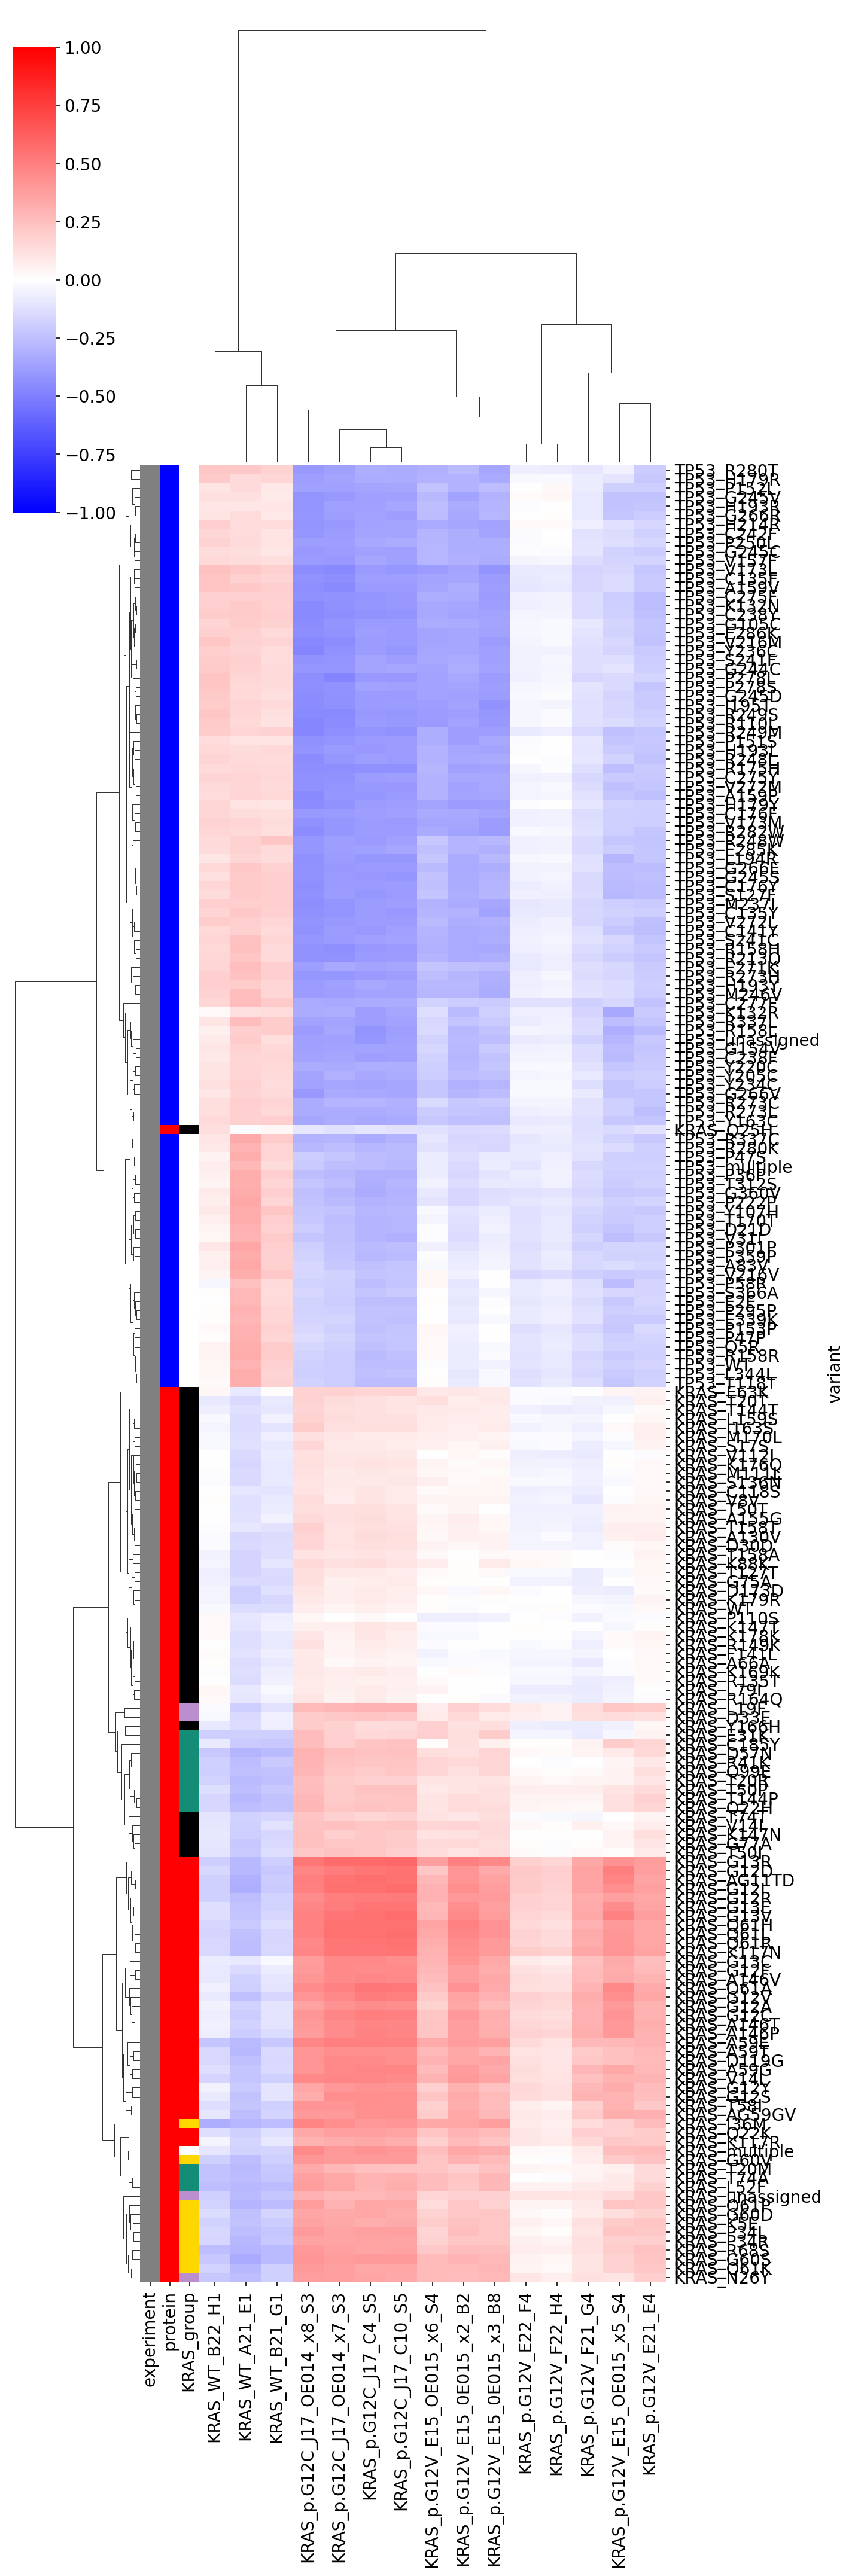

In [109]:
x=1
sns.clustermap(rep_df,#rep_df.loc[['KRAS' in x for x in list(rep_df.index)],:],#annot=True,
               cmap='bwr',vmin=-x,vmax=x,
               yticklabels=True,
               row_colors=color_df.loc[:,['experiment','protein','KRAS_group']],
               #metric='correlation',
               figsize=(10,30),
               #z_score=1,
               #figsize=(10,2),
              )

In [ ]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

In [ ]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad',cache=False)
adata

In [ ]:
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)

sorted_variants_df=pd.read_csv(DATA+'/'+PROTEIN+'/clustering/'+PROTEIN+'.corrL1.sorted_variants_2021-03-23.csv',header=None)
sorted_variants_df.index=sorted_variants_df[0]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

In [ ]:
x=1
sns.clustermap(rep_df.loc[sorted_variants,:],
               row_cluster=False,
               #annot=True,
               cmap='bwr',vmin=-x,vmax=x,
               yticklabels=True,
               figsize=(5,40),
              )

In [ ]:
df=pd.DataFrame({'condition':'rep',
                'corr':rep_sp})
df=pd.concat([df,
             pd.DataFrame({'condition':'between',
                'corr':between_sp})])

In [ ]:
fig,plots=plt.subplots(1)

sns.boxplot(data=df,x='condition',y='corr',ax=plots)
sns.stripplot(data=df,x='condition',y='corr',ax=plots)
plots.set_ylim(-0.5,0.5)

In [ ]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq=pd.read_csv(DATA+'/data/rnaseq/rawcounts_KRAS-TP53.csv',
                  index_col=0)
#convert to TPM
for c in rnaseq.columns:
    rnaseq[c] = rnaseq[c]/rnaseq[c].sum()*1000000
controls=rnaseq.loc[:,[x for x in rnaseq.columns if 'EMPTY' in x]]
rnaseq=rnaseq.loc[:,[x for x in rnaseq.columns if 'KRAS' in x]]
rnaseq.head()

In [ ]:
rnaseq.columns

In [ ]:
controls.columns

In [ ]:
rnaseq[rnaseq!=np.inf]=np.log1p(rnaseq[rnaseq!=np.inf])
rnaseq[rnaseq==np.inf]=0

In [ ]:
controls[controls!=np.inf]=np.log1p(controls[controls!=np.inf])
controls[controls==np.inf]=0

In [ ]:
rnadata=sc.AnnData(rnaseq).T
print(rnadata)

#annotate conditions
import re
conditions=[]
for i in range(rnadata.n_obs):
    obs=rnadata.obs_names[i]
    condition=re.sub('p.','',obs.split('_')[1])
    conditions.append(condition)
rnadata.obs['variant']=list(conditions)
rnadata.obs['rep']=rnadata.obs_names

print(rnadata)

In [ ]:
control_mean=controls.mean(axis=1)
control_sd=controls.mean(axis=1)
control_sd[control_sd==0]=1

In [ ]:
x=rnadata.X
for i in range(x.shape[0]):
    x[i,:]=np.divide(x[i,:]-control_mean,control_sd)

In [ ]:
rnadata.X=x

In [ ]:
var_genes=list(set(adata.var_names).intersection(rnadata.var_names))
print(len(var_genes))

In [ ]:
rnadata_var=rnadata[:,var_genes]

In [ ]:
adata_counts_log1p=sc.pp.log1p(adata_counts)

In [ ]:
evip=sc.AnnData(adata_counts.uns['bulk.variant'])

In [ ]:
unassigned_mean=adata_counts[adata_counts.obs['variant']=='unassigned',:].X.mean(axis=0)
unassigned_sd=np.array(adata_counts[adata_counts.obs['variant']=='unassigned',:].X.std(axis=0))
unassigned_sd[unassigned_sd==0]=1

In [ ]:
y=evip.X
for i in range(y.shape[0]):
    y[i,:]=np.divide(y[i,:]-unassigned_mean,unassigned_sd)
evip.X=y

In [ ]:
evip_var=evip[:,var_genes]
evip_var.obs['variant']=list(adata_counts.uns['bulk.variant'].index)

In [ ]:
rnadata_var.X

In [ ]:
#compare all evip pairs

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals,nan_policy='omit')
    #p,pp=pearsonr(xvals,yvals)
    d=distance.cityblock(xvals,yvals)
    p=0
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        #plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,d)

vs=['WT','G12C','G12V']
d1=evip_var
d2=rnadata_var

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

rep_sp=[]
rep_p=[]
between_sp=[]
between_p=[]
rep_d=[]
between_d=[]
for r1 in cols1:
    print(r1)
    for r2 in cols2:
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,d=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        if d1.obs['variant'].loc[r1]==d2.obs['variant'].loc[r2]:
            rep_sp.append(sp)
            rep_p.append(p)
            rep_d.append(d)
        else:
            between_sp.append(sp)
            between_p.append(p)
            between_d.append(d)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

In [ ]:
rep_df

In [ ]:
x=1
sns.clustermap(rep_df,annot=True,
               cmap='bwr',vmin=-x,vmax=x,
              )

In [ ]:
df=pd.DataFrame({'condition':'rep',
                'corr':rep_sp})
df=pd.concat([df,
             pd.DataFrame({'condition':'between',
                'corr':between_sp})])

fig,plots=plt.subplots(1)

sns.boxplot(data=df,x='condition',y='corr',ax=plots)
sns.stripplot(data=df,x='condition',y='corr',ax=plots)
#plots.set_ylim(-0.5,0.5)

In [ ]:
#t-tests
#go gene by gene and get the DE genes

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def test_across_genes(data1_df,data2_df,test='t-test',ps=1e-10,eps=1e-6):

    data1=np.array(data1_df)
    data2=np.array(data2_df)
    
    #check same numbers of genes for the 2 groups
    assert data1.shape[1]==data2.shape[1]
    num_genes=data1.shape[1]

    #get means, differences and log2 ratios
    X1_means=np.mean(data1,axis=0)
    X2_means=np.mean(data2,axis=0)
    differences=X1_means-X2_means
    ##log2_ratios=np.log2(X1_means+pseudocount)-np.log2(X2_means+pseudocount)

    pvals=[]
    for gene_idx in range(num_genes):
        
        #if gene_idx%1000==0:
        #    perturbseq.utils.display_progress(gene_idx,num_genes)

        X_1=data1[:,gene_idx]
        X_2=data2[:,gene_idx]
        
        if (X_1.sum()==0.0 and X_2.sum()==0.0) or (X_1.std()<eps and X_2.std()<eps):
            pvals.append(1.0) #everything is 0, give the worst p-value
            continue
        #print(gene_idx)
        if test=='Mann-Whitney':
            u,p=mannwhitneyu(X_1,X_2,alternative='two-sided')
        if test=='t-test':
            t,p=ttest_ind(X_1,X_2)
        #print(gene_idx,p,X_1.sum(),X_2.sum(),X_2)
            
        pvals.append(p)
        
    from statsmodels.stats.multitest import multipletests
    pvals=multipletests(pvals, alpha=0.05, method='fdr_bh')[1]
        
    #put together result
    results=pd.DataFrame({'condition1_mean':X1_means,
                          'condition2_mean':X2_means,
                          'difference':differences,
                          ##'log2_ratio':log2_ratios,
                          'p':np.multiply(-np.log10(np.array(pvals)+ps),np.sign(differences))},
                         index=data1_df.columns)
    return(results)

In [ ]:
v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

In [ ]:
data1=pd.DataFrame(adata[adata.obs['variant']==v,:].raw.X.toarray(),
                  columns=adata.raw.var_names)
data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].raw.X.toarray(),
                  columns=adata.raw.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

In [ ]:
data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                  columns=adata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

In [ ]:
comparison_genes=list(set(rna_res.index).intersection(set(evip_res.index)))
print(len(comparison_genes))

In [ ]:
cells_detected=np.sum(adata.raw[:,comparison_genes].X.toarray()>0.0,axis=0)
print(cells_detected.shape)

In [ ]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[comparison_genes,'p'],
           rna_res.loc[comparison_genes,'p'],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])
p,pp=pearsonr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])

plots.set_xlabel('sc-eVIP\nsigned -log10(p)')
plots.set_ylabel('RNA-seq\nsigned -log10(p)')
plots.set_title(v+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))


In [ ]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

x='p'
plots.scatter(evip_res.loc[comparison_genes,x],
           rna_res.loc[comparison_genes,x],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=0)
plt.axhline(y=0)

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,x],rna_res.loc[comparison_genes,x])
p,pp=pearsonr(evip_res.loc[comparison_genes,x],rna_res.loc[comparison_genes,x])



In [ ]:
#get genes to programs mapping
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

adata_pro=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad',cache=False)
adata_pro

In [ ]:
pros=list(set(adata_pro.var['bulk.variant.program']))
print(pros)

In [ ]:
for pro in pros:
    genes=adata_pro.var_names[adata_pro.var['bulk.variant.program']==pro]
    #now, make a plot for just these genes
    genes2=list(set(genes).intersection(set(comparison_genes)))
    
    fig,plots=plt.subplots(1)
    fig.set_size_inches(6,6)

    plots.scatter(evip_res.loc[genes2,'p'],
               rna_res.loc[genes2,'p'],s=3)
    plt.grid(False)

    plt.axvline(x=-1,color='gray')
    plt.axhline(y=-1,color='gray')
    plt.axvline(x=1,color='gray')
    plt.axhline(y=1,color='gray')

    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_res.loc[genes2,'p'],rna_res.loc[genes2,'p'])
    p,pp=pearsonr(evip_res.loc[genes2,'p'],rna_res.loc[genes2,'p'])

    plots.set_xlim(-11,11)
    plots.set_ylim(-5,5)
    plots.set_xlabel('sc-eVIP\nsigned -log10(p)')
    plots.set_ylabel('RNA-seq\nsigned -log10(p)')
    plots.set_title('pro: '+str(pro)+'\n'+v+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))
    plt.show()

In [ ]:
data=pd.DataFrame({'signed_p':list(rna_res.loc[comparison_genes,'p'])},index=comparison_genes)
data['program']=adata_pro.var['bulk.variant.program'].loc[comparison_genes]
data['program_color']=adata_pro.var['bulk.variant.program_color'].loc[comparison_genes]
data['signed_p']=data['signed_p'].astype(float)

In [ ]:
pal={}
for c in set(data['program_color']):
    pal[c]=c

In [ ]:
data.shape

In [ ]:
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,kind='swarm',
           )

In [ ]:
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,
            kind='swarm',
           )
plt.axhline(y=-1)
plt.axhline(y=1)
plt.grid(False)

In [ ]:
v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

In [ ]:
data=pd.DataFrame({'signed_p':list(rna_res.loc[comparison_genes,'p'])},index=comparison_genes)
data['program']=adata_pro.var['bulk.variant.program'].loc[comparison_genes]
data['program_color']=adata_pro.var['bulk.variant.program_color'].loc[comparison_genes]
data['signed_p']=data['signed_p'].astype(float)
pal={}
for c in set(data['program_color']):
    pal[c]=c
    
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,
            kind='swarm',
           )
plt.axhline(y=-1)
plt.axhline(y=1)
plt.grid(False)

In [ ]:
v='G12V'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

In [ ]:
data=pd.DataFrame({'signed_p':list(rna_res.loc[comparison_genes,'p'])},index=comparison_genes)
data['program']=adata_pro.var['bulk.variant.program'].loc[comparison_genes]
data['program_color']=adata_pro.var['bulk.variant.program_color'].loc[comparison_genes]
data['signed_p']=data['signed_p'].astype(float)
pal={}
for c in set(data['program_color']):
    pal[c]=c
    
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,
            kind='swarm',
           )
plt.axhline(y=-1)
plt.axhline(y=1)
plt.grid(False)

In [ ]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[comparison_genes,'p'],
           rna_res.loc[comparison_genes,'p'],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])
p,pp=pearsonr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])

plots.set_xlabel('sc-eVIP\nsigned -log10(p)')
plots.set_ylabel('RNA-seq\nsigned -log10(p)')
plots.set_title(v+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))


In [ ]:
v='G12V'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

In [ ]:
v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

In [ ]:
comparison_genes=list(set(rna_res.index).intersection(set(evip_res.index)))
print(len(comparison_genes))
cells_detected=np.sum(adata.raw[:,comparison_genes].X.toarray()>0.0,axis=0)
print(cells_detected.shape)

In [ ]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[comparison_genes,'p'],
           rna_res.loc[comparison_genes,'p'],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])
p,pp=pearsonr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])

plots.set_xlabel('G12C RNAseq\nsigned -log10(p)')
plots.set_ylabel('G12V RNA-seq\nsigned -log10(p)')
plots.set_title('G12C vs G12V\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))


In [ ]:


def compare_variant(v,rnadata,adata,test='t-test'):
    
    #rnaseq
    data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
    data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                      columns=rnadata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    rna_res=test_across_genes(data1,data2,test=test)
    
    data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
    data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                      columns=adata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    evip_res=test_across_genes(data1,data2,test=test)
    
    #shared genes
    comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
    print(len(comparison_genes))

    fig,plots=plt.subplots(1,2)
    fig.set_size_inches(8,4)

    rna_df=pd.DataFrame({'signed_p':rna_res.loc[comparison_genes,'p']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'signed_p':evip_res.loc[comparison_genes,'p']},
                       index=comparison_genes)

    plots[0].scatter(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    p,pp=pearsonr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    plots[0].axvline(x=2,linestyle='--',color='gray')
    plots[0].axvline(x=-2,linestyle='--',color='gray')
    plots[0].axhline(y=2,linestyle='--',color='gray')
    plots[0].axhline(y=-2,linestyle='--',color='gray')

    plots[0].set_xlabel('sc-eVIP')
    plots[0].set_ylabel('RNA-seq')
    plots[0].grid(False)
    plots[0].set_title(v+'\n'+'signed p-value'+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))

    rna_df=pd.DataFrame({'difference':rna_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'difference':evip_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)


    plots[1].scatter(evip_df['difference'],rna_df.loc[evip_df.index,'difference'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    plots[1].axvline(x=0,linestyle='--',color='gray')
    plots[1].axhline(y=0,linestyle='--',color='gray')
    plots[1].set_xlim(-0.25,0.25)

    plots[1].set_xlabel('sc-eVIP')
    plots[1].set_ylabel('RNA-seq')
    plots[1].grid(False)
    plots[1].set_title(v+'\n'+'difference')
    fig.subplots_adjust(wspace=0.5)
    plt.show()
    
compare_variant('G12C',rnadata[:,shared_genes],adata[:,shared_genes])

In [ ]:
def bulk(adata_here,grouping_variable,by_batch=False,return_matrix=False,use_raw=False):

    """Compute an in silico bulk set of expression profiles, based on cell labels                                                       
                                                                                                                                        
    Parameters                                                                                                                          
    ----------                                                                                                                          
    adata_here : `scanpy Anndata`                                                                                                       
    grouping_variable : `str`                                                                                                           
        The name of the variable that specifies a label for each cell. This variable must be accessible as `adata_here.obs[grouping_var\
iable]`                                                                                                                                 
    by_batch : `bool`                                                                                                                   
        Whether to combine data from cells with the same label but from different batches.                                              
        If this is set to True, adata_here must have a adata_here.obs["batch"]                                                          
                                                                                                                                        
    Returns                                                                                                                             
    -------                                                                                                                             
    profile_matrix_df : a pandas DataFrame of size (number of conditions) x (number of genes).                                          
                        The number of conditions is: number of unique labels in `adata_here.obs[grouping_variable]` if by_batch==False  
                                                     number of unique labels times the number of batches if by batch==True              
    """

    #construct the profiles                                                                                                             
    profiles=list(set(adata_here.obs[grouping_variable]))
    adata_here.obs['profile']=adata_here.obs[grouping_variable]

    if by_batch:
        profile_list=[]
        #make a new variable that combines batch and variable into 1                                                                    
        for cell_idx in range(len(adata_here.obs_names)):
            profile=adata_here.obs['batch'][cell_idx]+'_'+adata_here.obs[grouping_variable][cell_idx]
            #if profile not in profile_list:
            profile_list.append(profile)
        adata_here.obs['profile']=profile_list
        profiles=list(set(profile_list))

    if not use_raw:
        genes=adata_here.var_names
    else:
        genes=adata_here.raw.var_names
    profile_matrix=np.zeros((len(profiles),len(genes)))
    print(len(profiles))
    for profile_idx in range(len(profiles)):
        if profile_idx%1000==0:
            print(profile_idx)
        profile=profiles[profile_idx]
        cells_with_profile=list(adata_here.obs_names[adata_here.obs['profile']==profile])
        if not use_raw:
            data_profile=adata_here[cells_with_profile,:].X.toarray()
        else:
            data_profile=adata_here.raw[cells_with_profile,:].X
        profile_matrix[profile_idx,:]=data_profile.mean(axis=0)
    profile_matrix_df=pd.DataFrame(profile_matrix)
    profile_matrix_df.index=profiles
    profile_matrix_df.columns=genes
    adata_here.uns['bulk.'+grouping_variable]=profile_matrix_df
    if return_matrix:
        return(profile_matrix_df)


sc_bulk_counts=bulk(adata_counts[adata_counts.obs['variant'].isin(['WT','G12C','G12V']),:],
                                 'variant',use_raw=False,by_batch=True,return_matrix=True)

In [ ]:
variants=[]
for i in range(sc_bulk_counts.shape[0]):
    variants.append(list(sc_bulk_counts.index)[i].split('_')[1])
print(variants)

In [ ]:
scevip=sc.AnnData(sc_bulk_counts)#adata.uns['bulk.variant'])
scevip.obs['variant']=variants#list(adata.uns['bulk.variant'].index)
#scevip.X=scevip.X-scevip[scevip.obs['variant']=='WT',:].X.mean(axis=0)

sc.pp.scale(scevip)
scevip

In [ ]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq=pd.read_csv(DATA+'/data/rnaseq/RNAseq.2021-02-09.transcript_quants_log2TPM_KRAS-TP53.csv',
                  index_col=0)
rnaseq.head()

In [ ]:
np.sum(rnaseq==np.inf)

In [ ]:
np.sum(rnaseq==-np.inf)

In [ ]:
#log1p
rnaseq[rnaseq!=np.inf]=np.log1p(np.power(2,rnaseq[rnaseq!=np.inf]))
rnaseq[rnaseq==np.inf]=0

In [ ]:
c=0
for col in rnaseq.columns:
    if 'G12V' in col:
        c+=1
print('G12V',c)

c=0
for col in rnaseq.columns:
    if 'G12C' in col:
        c+=1
print('G12C',c)

c=0
for col in rnaseq.columns:
    if 'WT' in col:
        c+=1
print('WT',c)

In [ ]:
#col='KRAS_p.G12C_J17_C4_S5'
col='KRAS_WT_A21_E1'
a=plt.hist(rnaseq[col],100)
plt.xlabel('log1p')

In [ ]:
rnadata=sc.AnnData(rnaseq).T
print(rnadata)

#annotate conditions
import re
conditions=[]
for i in range(rnadata.n_obs):
    obs=rnadata.obs_names[i]
    if 'KRAS' not in obs:
        condition='other'
    else:
        condition=re.sub('p.','',obs.split('_')[1])
    conditions.append(condition)
rnadata.obs['variant']=list(conditions)
rnadata.obs['rep']=rnadata.obs_names
#rnadata.X=rnadata.X-rnadata[rnadata.obs['variant']=='WT',:].X.mean(axis=0)

#zscore rnadata
#rnadata=rnadata[rnadata.obs['variant']!='other',:]
sc.pp.scale(rnadata)

print(rnadata)

In [ ]:
rnadata.obs

In [ ]:
shared_genes=list(set(adata.var_names).intersection(set(rnadata.var_names)))
print(len(shared_genes))

In [ ]:

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals)
    p,pp=pearsonr(xvals,yvals)
    di=distance.cityblock(xvals,yvals)
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,di)

vs=['WT','G12C','G12V']
d1=scevip[:,shared_genes]
d2=rnadata[:,shared_genes]

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

for r1 in cols1:
    for r2 in cols2:
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,di=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

In [ ]:
x=1
g=sns.clustermap(rep_df,#.loc[['G12C','G12V'],:],#annot=True,
               cmap='bwr',vmin=-x,vmax=x,
                 cbar_pos=(0.02,0.01,0.1,0.05),
                 #cbar_kws={'orientation':'horizontal',
                 #         'label':'Spearman\ncorrelation',
                 #          'ticks':[-1,1]},
                 figsize=(10,30),yticklabels=True,xticklabels=True,
              #figsize=(8,5)
                )
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.savefig(FIGS+'/RNAseq.heatmap.sp.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/RNAseq.heatmap.sp.png',bbox_inches = "tight")

T-tests between variant and WT
==

In [ ]:
#go gene by gene and get the DE genes

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def test_across_genes(data1_df,data2_df,test='t-test',ps=1e-10,eps=1e-6):

    data1=np.array(data1_df)
    data2=np.array(data2_df)
    
    #check same numbers of genes for the 2 groups
    assert data1.shape[1]==data2.shape[1]
    num_genes=data1.shape[1]

    #get means, differences and log2 ratios
    X1_means=np.mean(data1,axis=0)
    X2_means=np.mean(data2,axis=0)
    differences=X1_means-X2_means
    ##log2_ratios=np.log2(X1_means+pseudocount)-np.log2(X2_means+pseudocount)

    pvals=[]
    for gene_idx in range(num_genes):
        
        #if gene_idx%1000==0:
        #    perturbseq.utils.display_progress(gene_idx,num_genes)

        X_1=data1[:,gene_idx]
        X_2=data2[:,gene_idx]
        
        if (X_1.sum()==0.0 and X_2.sum()==0.0) or (X_1.std()<eps and X_2.std()<eps):
            pvals.append(1.0) #everything is 0, give the worst p-value
            continue
        #print(gene_idx)
        if test=='Mann-Whitney':
            u,p=mannwhitneyu(X_1,X_2,alternative='two-sided')
        if test=='t-test':
            t,p=ttest_ind(X_1,X_2)
        #print(gene_idx,p,X_1.sum(),X_2.sum(),X_2)
            
        pvals.append(p)
        
    from statsmodels.stats.multitest import multipletests
    pvals=multipletests(pvals, alpha=0.05, method='fdr_bh')
        
    #put together result
    results=pd.DataFrame({'condition1_mean':X1_means,
                          'condition2_mean':X2_means,
                          'difference':differences,
                          ##'log2_ratio':log2_ratios,
                          'p':np.multiply(-np.log10(np.array(pvals)+ps),np.sign(differences))},
                         index=data1_df.columns)
    return(results)

def compare_variant(v,rnadata,adata,test='t-test'):
    
    #rnaseq
    data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
    data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                      columns=rnadata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    rna_res=test_across_genes(data1,data2,test=test)
    
    data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
    data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                      columns=adata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    evip_res=test_across_genes(data1,data2,test=test)
    
    #shared genes
    comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
    print(len(comparison_genes))

    fig,plots=plt.subplots(1,2)
    fig.set_size_inches(8,4)

    rna_df=pd.DataFrame({'signed_p':rna_res.loc[comparison_genes,'p']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'signed_p':evip_res.loc[comparison_genes,'p']},
                       index=comparison_genes)

    plots[0].scatter(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    p,pp=pearsonr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    plots[0].axvline(x=2,linestyle='--',color='gray')
    plots[0].axvline(x=-2,linestyle='--',color='gray')
    plots[0].axhline(y=2,linestyle='--',color='gray')
    plots[0].axhline(y=-2,linestyle='--',color='gray')

    plots[0].set_xlabel('sc-eVIP')
    plots[0].set_ylabel('RNA-seq')
    plots[0].grid(False)
    plots[0].set_title(v+'\n'+'signed p-value'+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))

    rna_df=pd.DataFrame({'difference':rna_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'difference':evip_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)


    plots[1].scatter(evip_df['difference'],rna_df.loc[evip_df.index,'difference'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    plots[1].axvline(x=0,linestyle='--',color='gray')
    plots[1].axhline(y=0,linestyle='--',color='gray')
    plots[1].set_xlim(-0.25,0.25)

    plots[1].set_xlabel('sc-eVIP')
    plots[1].set_ylabel('RNA-seq')
    plots[1].grid(False)
    plots[1].set_title(v+'\n'+'difference')
    fig.subplots_adjust(wspace=0.5)
    plt.show()
    
compare_variant('G12C',rnadata[:,shared_genes],adata[:,shared_genes])

In [ ]:
compare_variant('G12V',rnadata[:,shared_genes],adata[:,shared_genes])

In [ ]:
#rnaseq

v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                  columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
              columns=adata.var_names)
data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                  columns=adata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

#shared genes
comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
print(len(comparison_genes))

In [ ]:
x=10
plt.scatter(np.mean(sc_bulk_counts.T.loc[evip_res.index,[a for a in sc_bulk_counts.T.columns if 'WT' in a]],axis=1),
           evip_res['p'],
           c=rna_res.loc[evip_res.index,'p'],cmap='bwr',
            vmin=-10,vmax=10,
           s=5)
plt.grid(False)
#plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')
plt.xlabel('expression in WT (sc)')
plt.ylabel('sc-eVIP p-value')
plt.title('RNA p-value ')
plt.xlim(-1,4)

In [ ]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[evip_res.index,'p'],
           rna_res.loc[evip_res.index,'p'],s=5,
           color='black')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

In [ ]:
x=10
plt.scatter(np.mean(scevip.loc[evip_res.index,[a for a in rnaseq.columns if 'WT' in a]],axis=1),
           evip_res['p'],
           c=rna_res.loc[evip_res.index,'p'],cmap='bwr',
            vmin=-10,vmax=10,
           s=5)
plt.grid(False)
plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')
plt.xlabel('expression in WT (RNA-seq)')
plt.ylabel('sc-eVIP p-value')
plt.title('RNA p-value ')

In [ ]:
#go gene by gene and get the DE genes

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def test_across_genes(data1_df,data2_df,test='t-test',ps=1e-10,eps=1e-6):

    data1=np.array(data1_df)
    data2=np.array(data2_df)
    
    #check same numbers of genes for the 2 groups
    assert data1.shape[1]==data2.shape[1]
    num_genes=data1.shape[1]

    #get means, differences and log2 ratios
    X1_means=np.mean(data1,axis=0)
    X2_means=np.mean(data2,axis=0)
    differences=X1_means-X2_means
    ##log2_ratios=np.log2(X1_means+pseudocount)-np.log2(X2_means+pseudocount)

    pvals=[]
    for gene_idx in range(num_genes):
        
        #if gene_idx%1000==0:
        #    perturbseq.utils.display_progress(gene_idx,num_genes)

        X_1=data1[:,gene_idx]
        X_2=data2[:,gene_idx]
        
        if (X_1.sum()==0.0 and X_2.sum()==0.0) or (X_1.std()<eps and X_2.std()<eps):
            pvals.append(1.0) #everything is 0, give the worst p-value
            continue
        #print(gene_idx)
        if test=='Mann-Whitney':
            u,p=mannwhitneyu(X_1,X_2,alternative='two-sided')
        if test=='t-test':
            t,p=ttest_ind(X_1,X_2)
        #print(gene_idx,p,X_1.sum(),X_2.sum(),X_2)
            
        pvals.append(p)
        
    #put together result
    results=pd.DataFrame({'condition1_mean':X1_means,
                          'condition2_mean':X2_means,
                          'difference':differences,
                          ##'log2_ratio':log2_ratios,
                          'p':np.multiply(-np.log10(np.array(pvals)+ps),np.sign(differences))},
                         index=data1_df.columns)
    return(results)



In [ ]:
def compare_variant(v,rnadata,adata,test='t-test'):
    
    #rnaseq
    data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
    data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                      columns=rnadata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    rna_res=test_across_genes(data1,data2,test=test)
    
    data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
    data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                      columns=adata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    evip_res=test_across_genes(data1,data2,test=test)
    
    #shared genes
    comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
    print(len(comparison_genes))

    fig,plots=plt.subplots(1,2)
    fig.set_size_inches(8,4)

    rna_df=pd.DataFrame({'signed_p':rna_res.loc[comparison_genes,'p']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'signed_p':evip_res.loc[comparison_genes,'p']},
                       index=comparison_genes)

    plots[0].scatter(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    p,pp=pearsonr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    plots[0].axvline(x=2,linestyle='--',color='gray')
    plots[0].axvline(x=-2,linestyle='--',color='gray')
    plots[0].axhline(y=2,linestyle='--',color='gray')
    plots[0].axhline(y=-2,linestyle='--',color='gray')

    plots[0].set_xlabel('sc-eVIP')
    plots[0].set_ylabel('RNA-seq')
    plots[0].grid(False)
    plots[0].set_title(v+'\n'+'signed p-value'+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))

    rna_df=pd.DataFrame({'difference':rna_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'difference':evip_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)


    plots[1].scatter(evip_df['difference'],rna_df.loc[evip_df.index,'difference'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    plots[1].axvline(x=0,linestyle='--',color='gray')
    plots[1].axhline(y=0,linestyle='--',color='gray')
    plots[1].set_xlim(-0.25,0.25)

    plots[1].set_xlabel('sc-eVIP')
    plots[1].set_ylabel('RNA-seq')
    plots[1].grid(False)
    plots[1].set_title(v+'\n'+'difference')
    fig.subplots_adjust(wspace=0.5)
    plt.show()
    
compare_variant('G12C',rnadata[:,shared_top_genes],evip_counts[:,shared_top_genes])

In [ ]:
df=pd.read_csv('/ahg/regevdata/projects/Cell2CellCommunication/berger.csv',sep=',',header=1)
df=df.iloc[:194,:]
df

In [ ]:
len(list(set(df['Allele'])))

In [ ]:
len(list(set(df.loc[~df['eVIP_prediction'].isin(['Neutral','n.d']),'Gene Symbol'])))

In [ ]:
40/48